# Data Preprocessing and Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

In [2]:
file_path = "../data/raw/data.csv"
df = pd.read_csv(file_path)

In [3]:
# First 5 rows of the dataset:
print(df.head())
print(df.shape)
print(df.columns.tolist())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [4]:
# Dataset Info:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
predictors =df.drop(columns=['Bankrupt?'])

In [6]:
target = df['Bankrupt?']
print(target)

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64


In [7]:
predictors.columns = [f"X{i+1}" for i in range(predictors.shape[1])]

In [8]:
print(predictors.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91',
       'X92', 'X93', 'X94', 'X95'],
      dtype='object')


# Descriptive Analysis

In [9]:
print(predictors.describe())

                X1           X2           X3           X4           X5  \
count  6819.000000  6819.000000  6819.000000  6819.000000  6819.000000   
mean      0.505180     0.558625     0.553589     0.607948     0.607929   
std       0.060686     0.065620     0.061595     0.016934     0.016916   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.476527     0.535543     0.527277     0.600445     0.600434   
50%       0.502706     0.559802     0.552278     0.605997     0.605976   
75%       0.535563     0.589157     0.584105     0.613914     0.613842   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                X6           X7           X8           X9          X10  ...  \
count  6819.000000  6819.000000  6819.000000  6819.000000  6819.000000  ...   
mean      0.998755     0.797190     0.809084     0.303623     0.781381  ...   
std       0.013010     0.012869     0.013601     0.011163     0.012679  ...   
min       0.00000

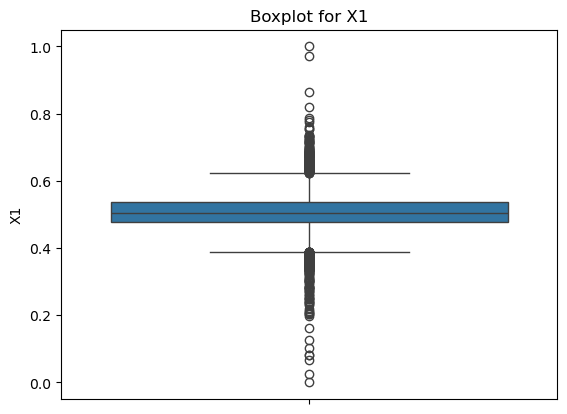

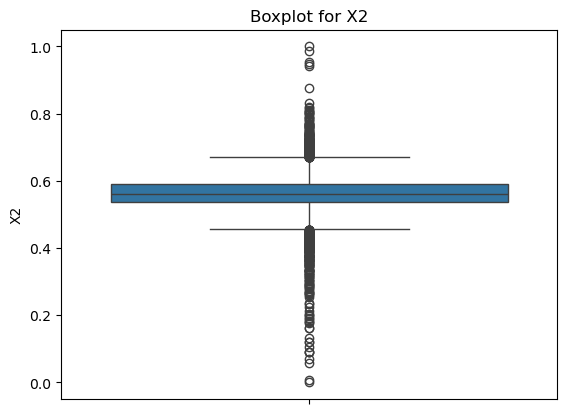

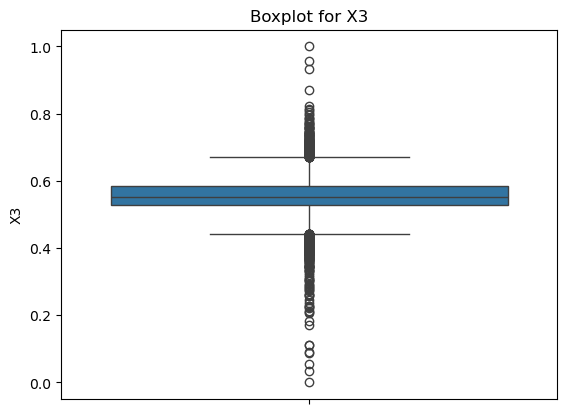

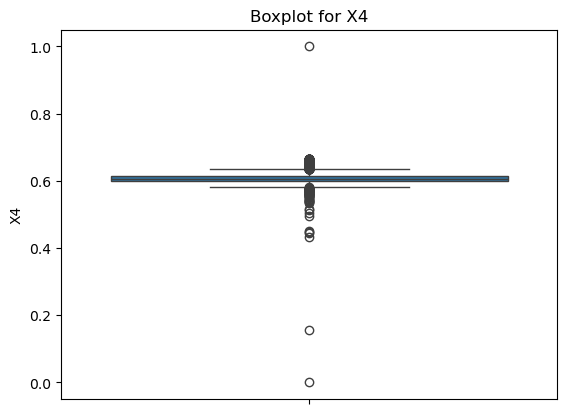

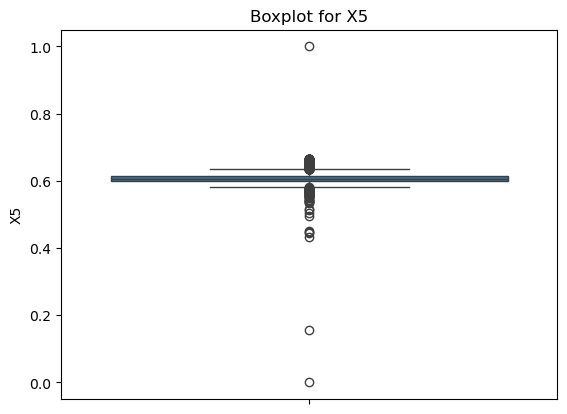

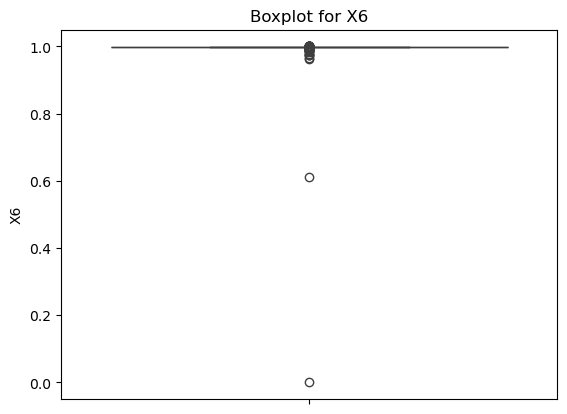

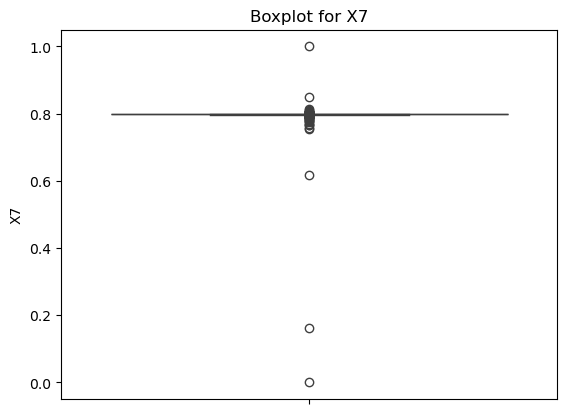

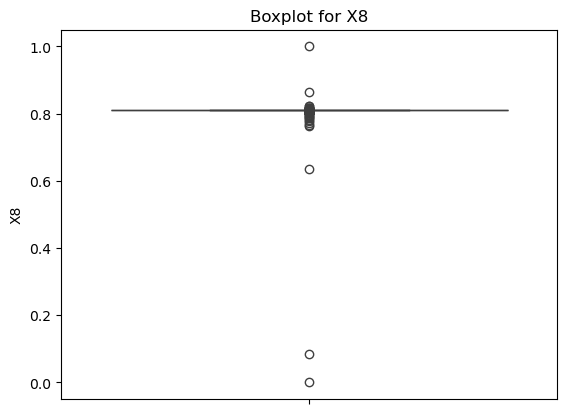

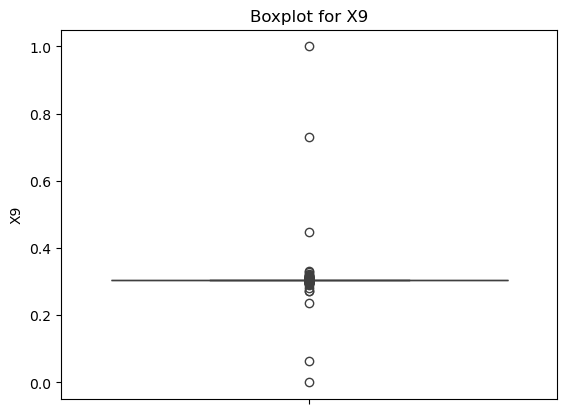

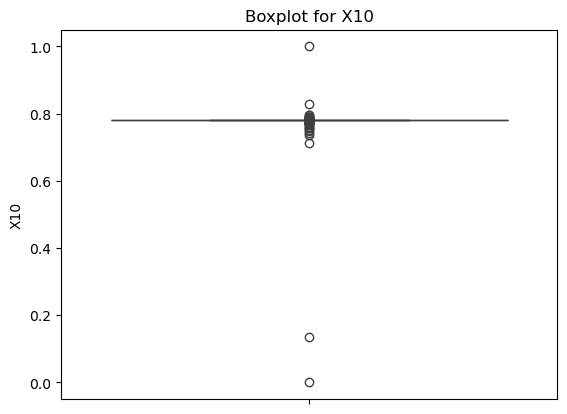

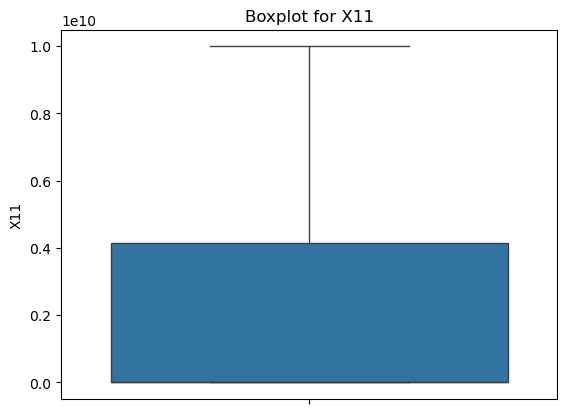

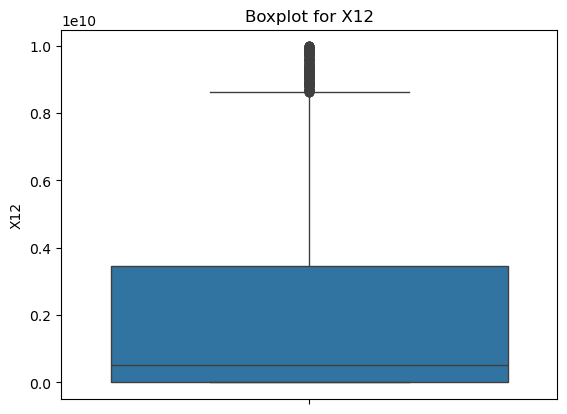

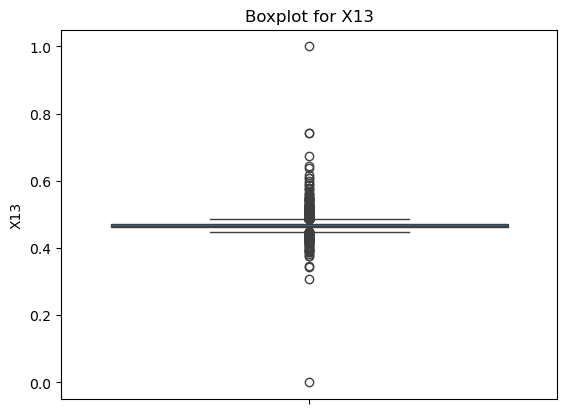

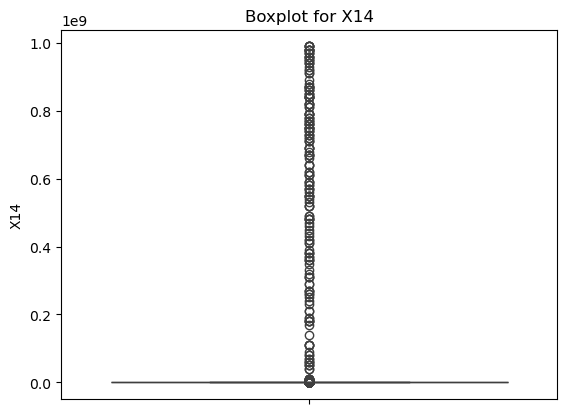

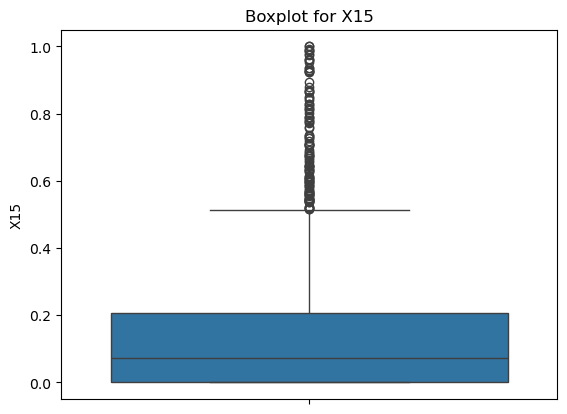

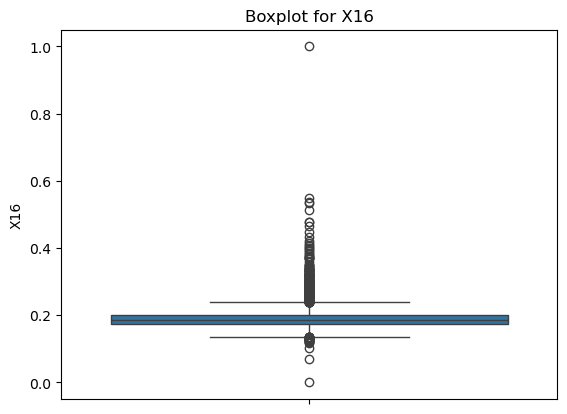

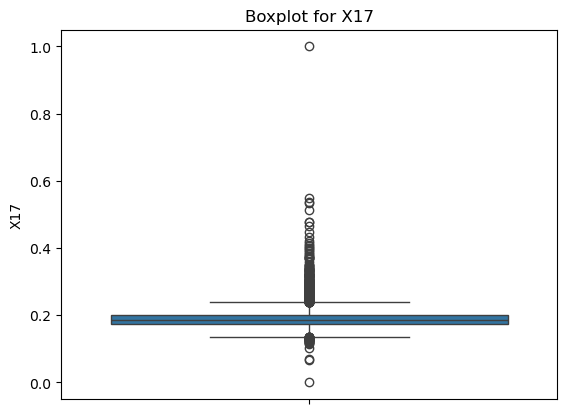

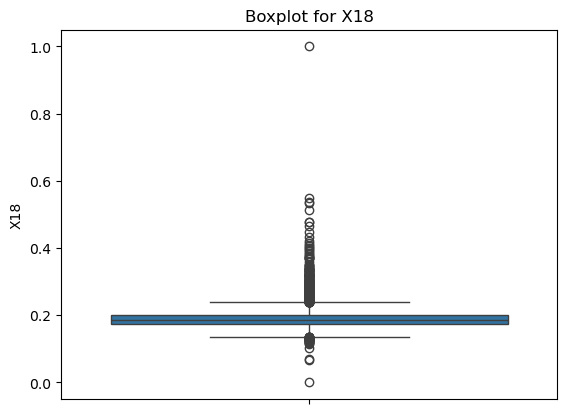

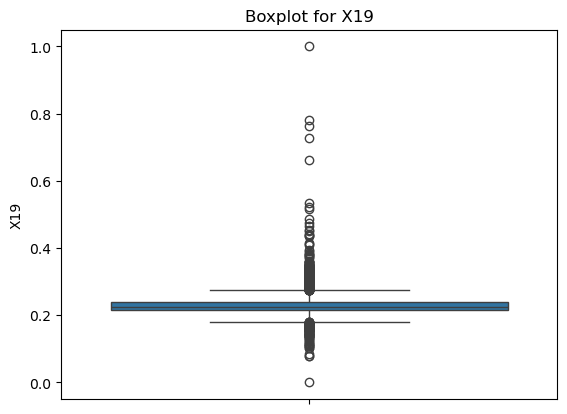

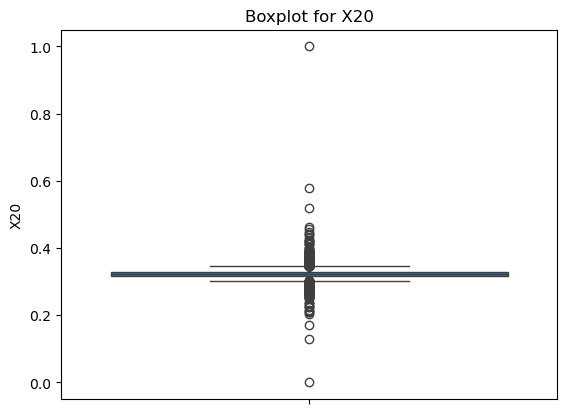

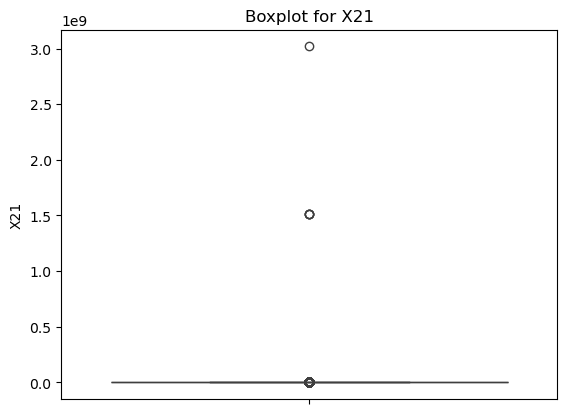

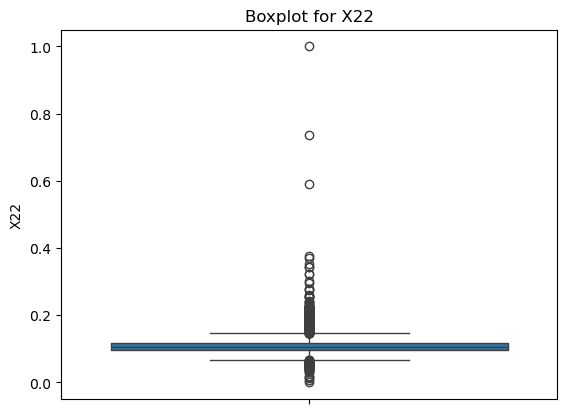

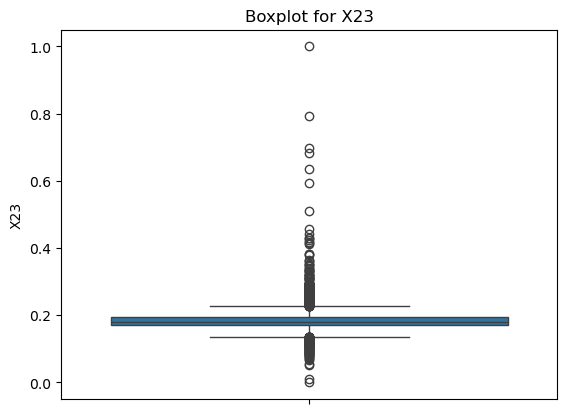

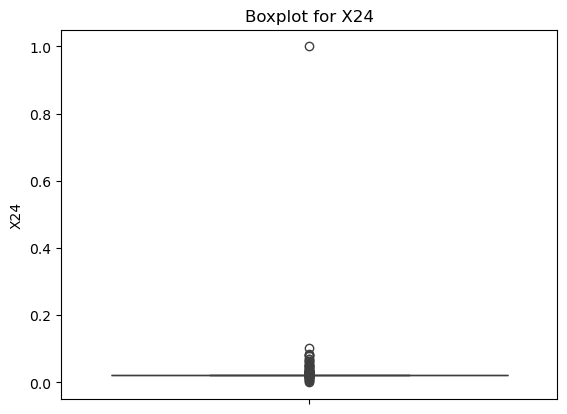

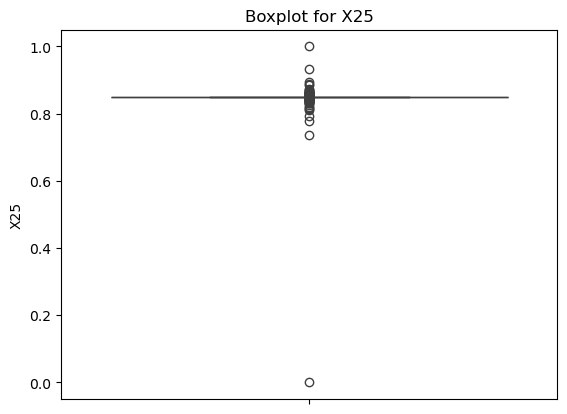

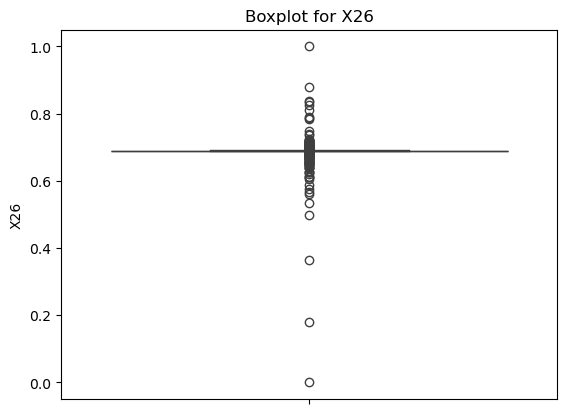

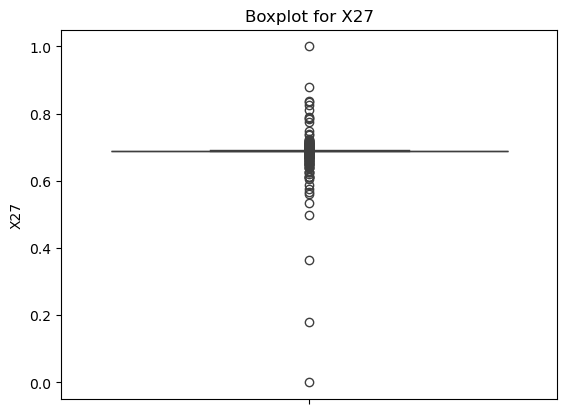

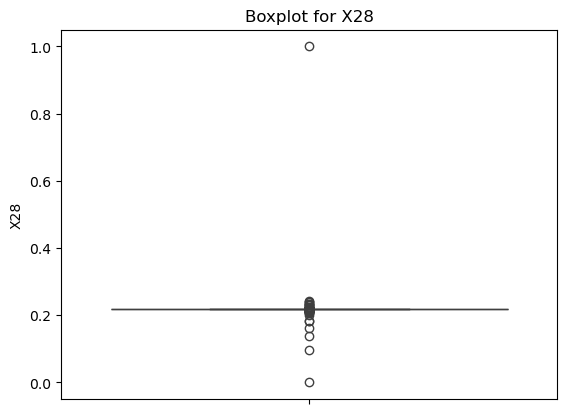

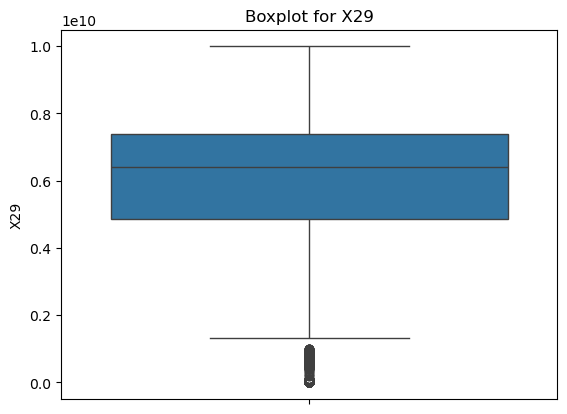

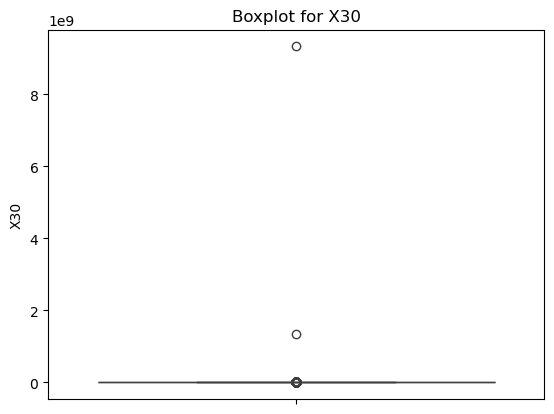

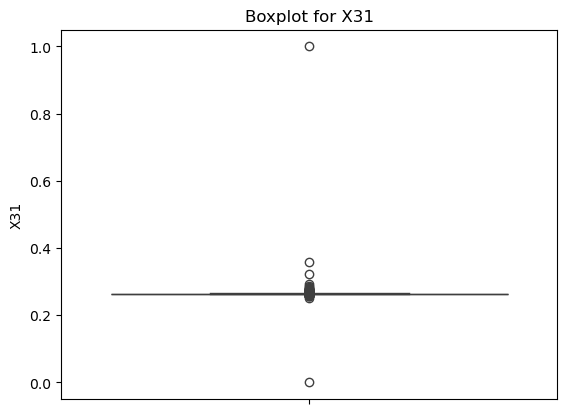

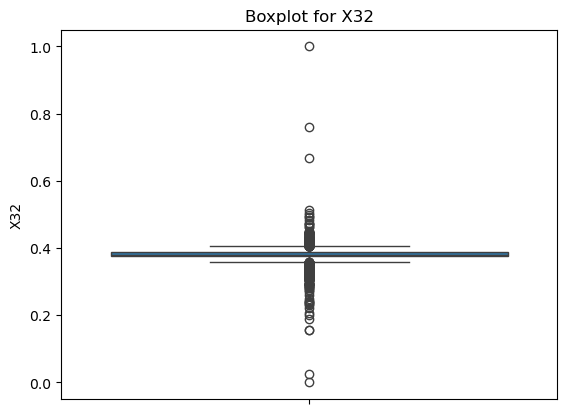

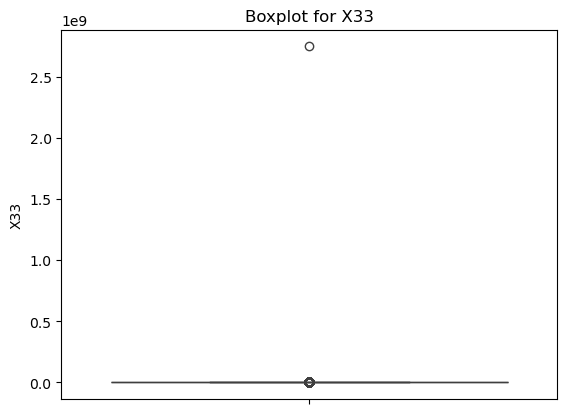

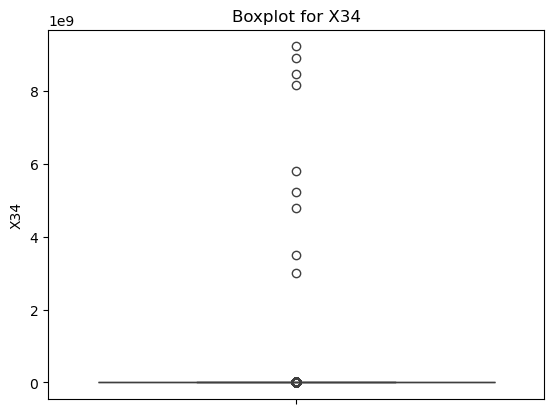

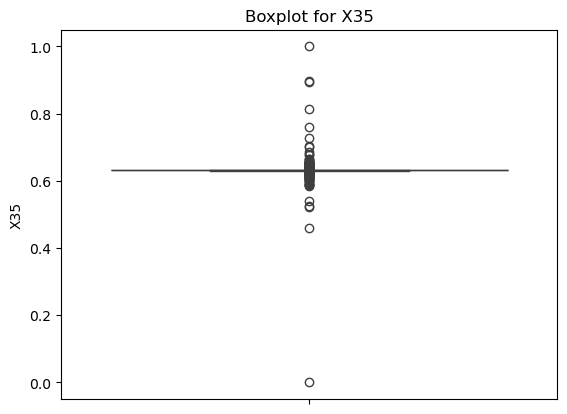

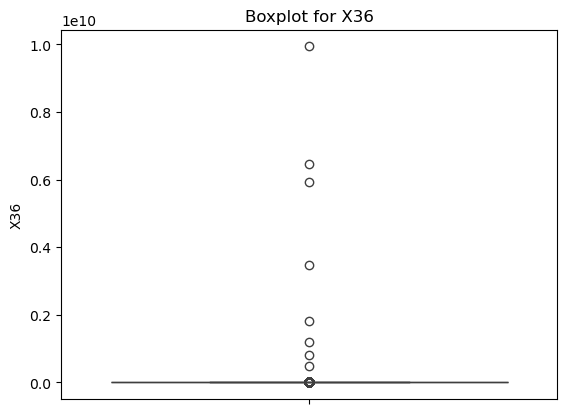

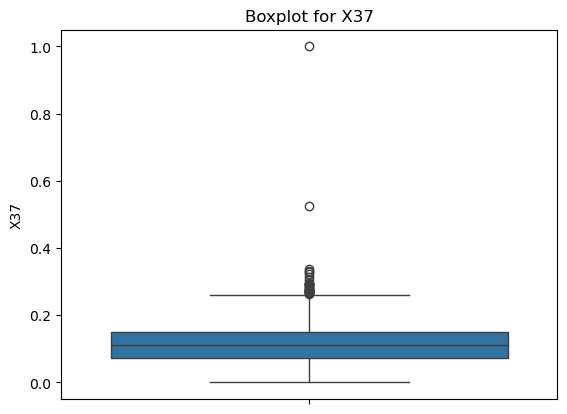

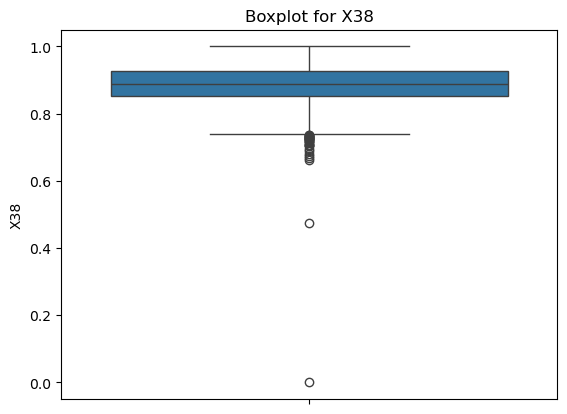

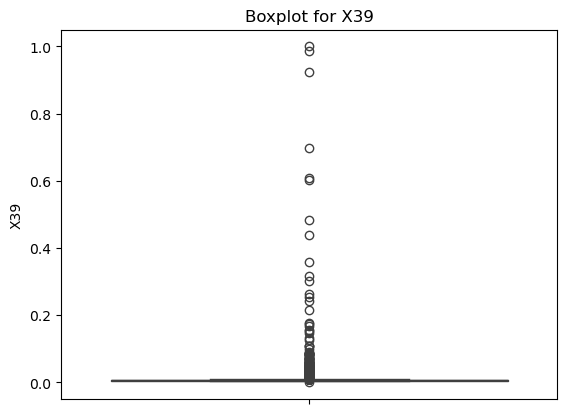

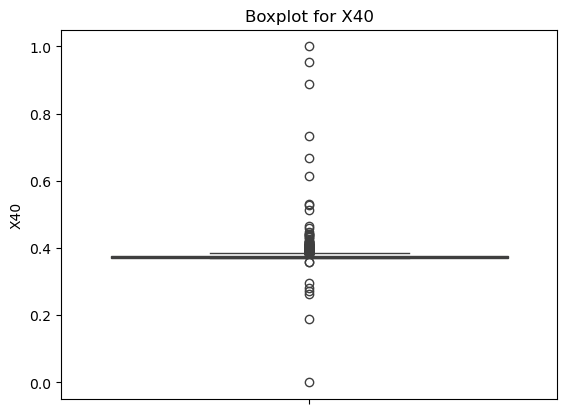

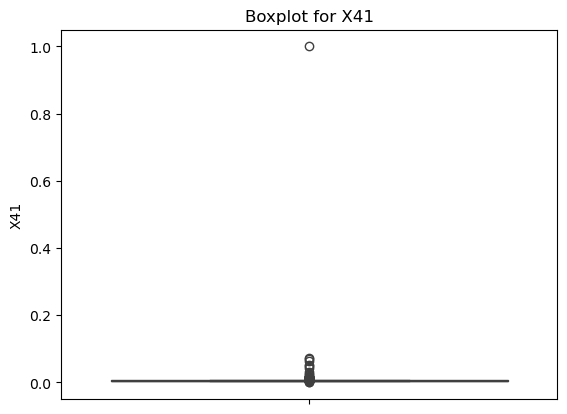

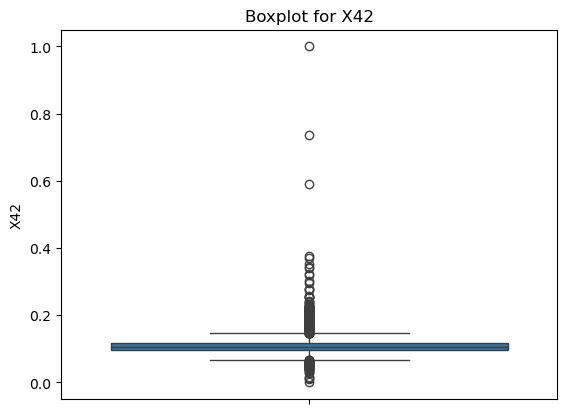

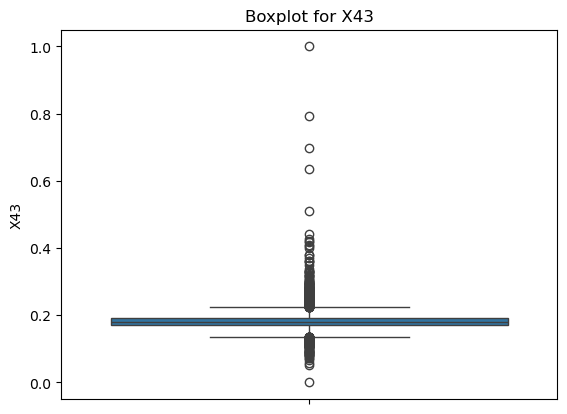

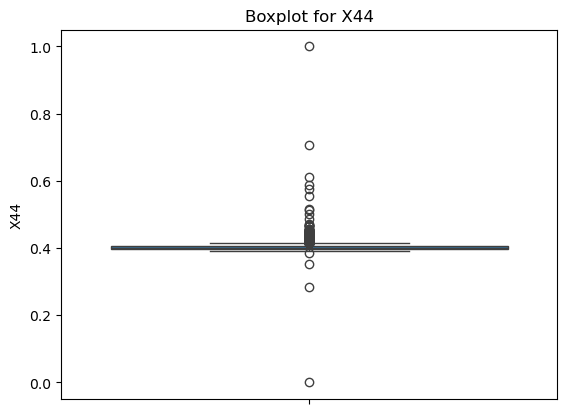

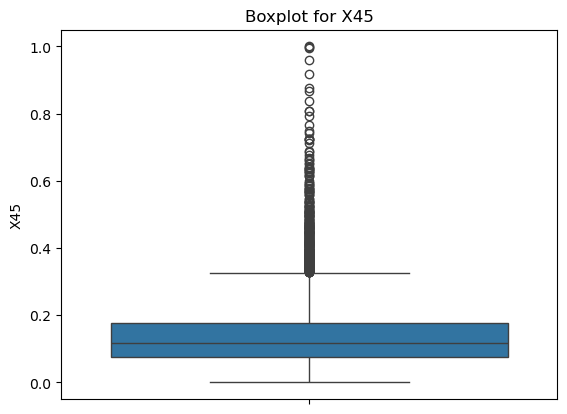

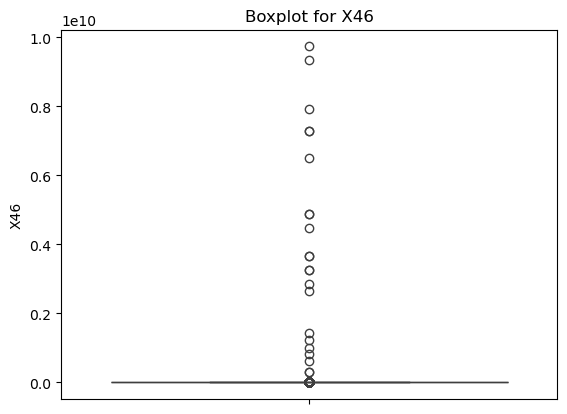

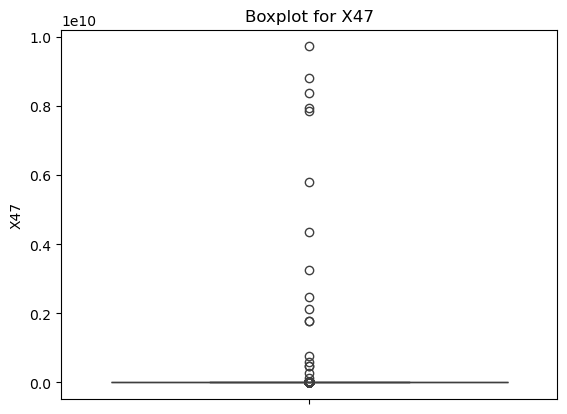

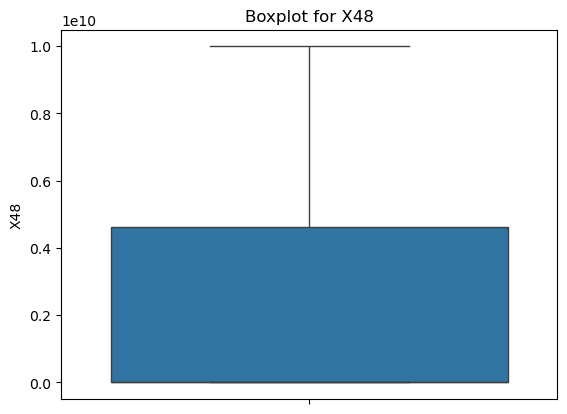

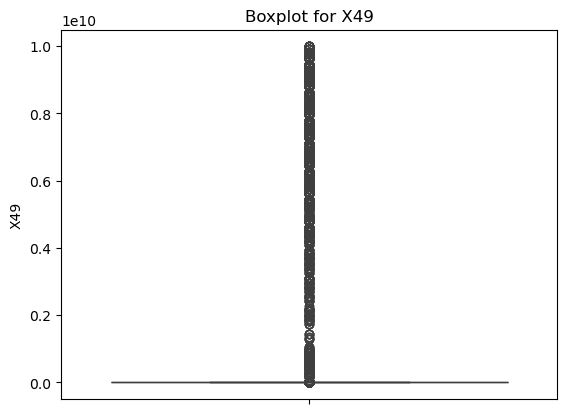

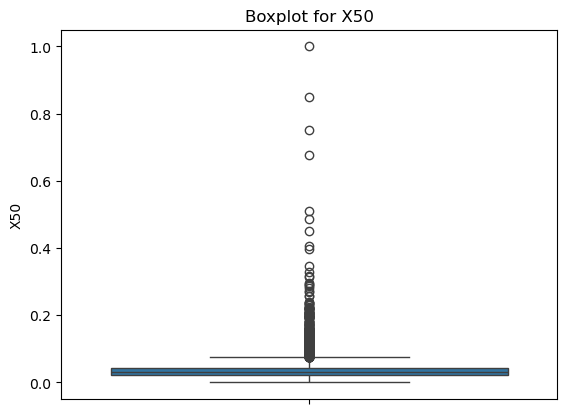

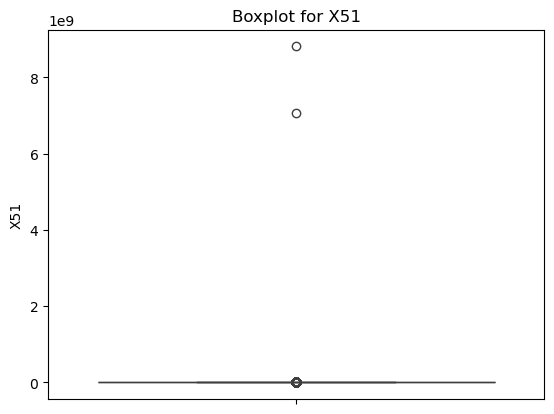

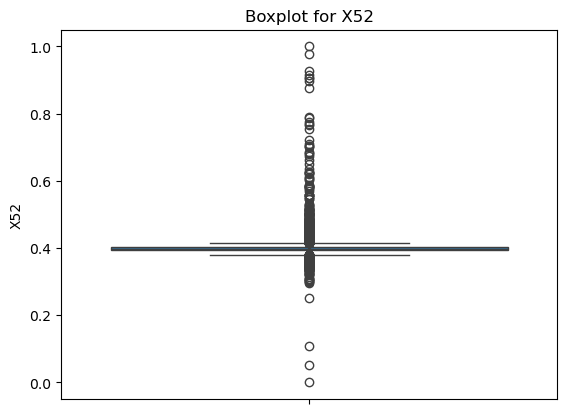

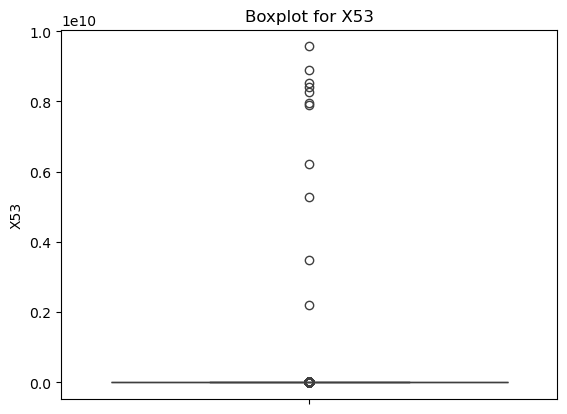

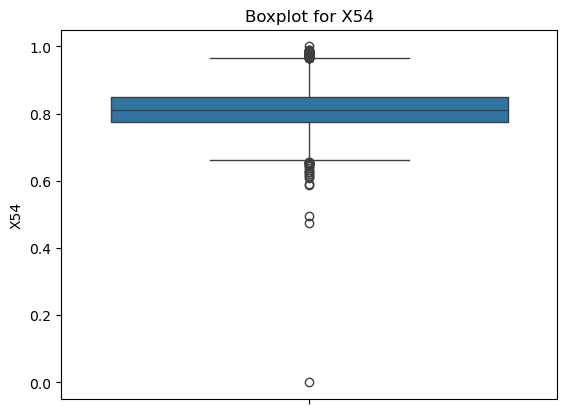

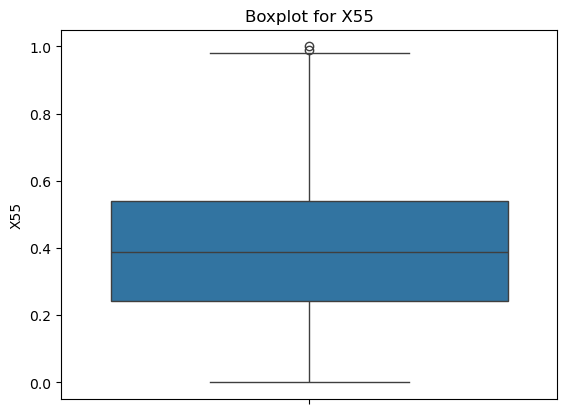

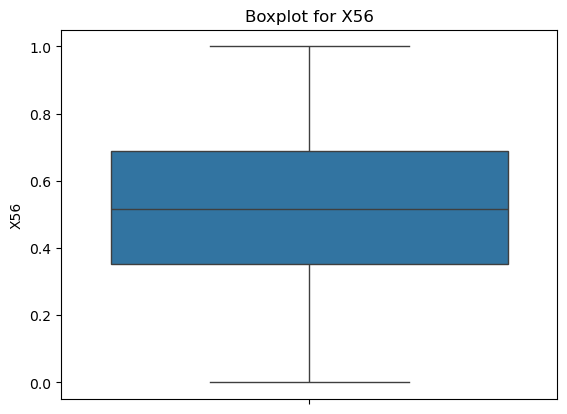

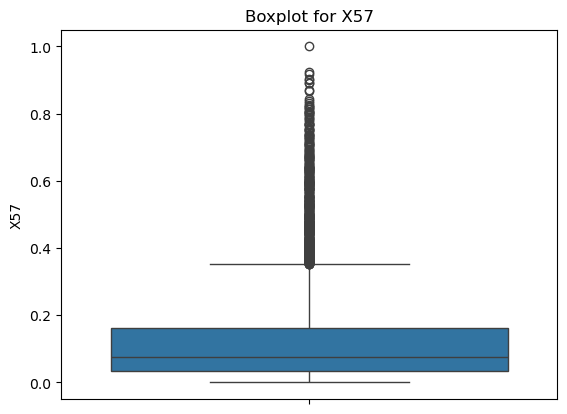

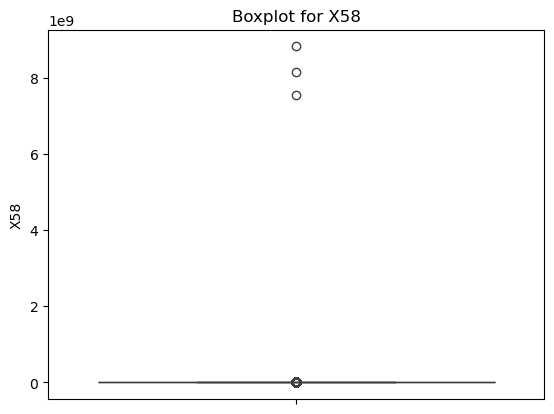

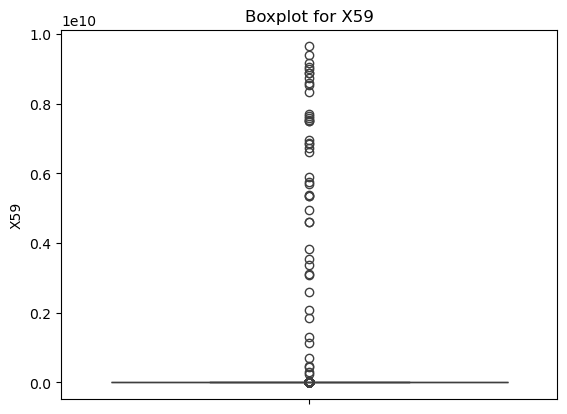

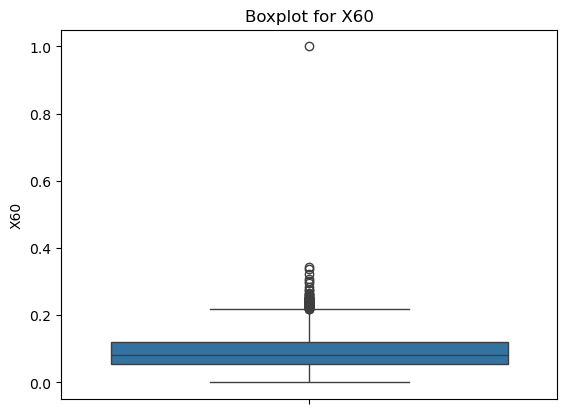

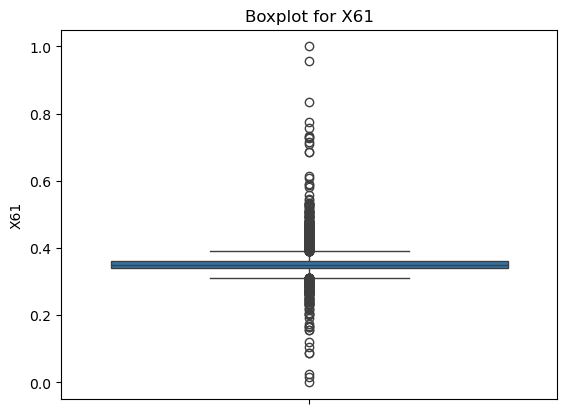

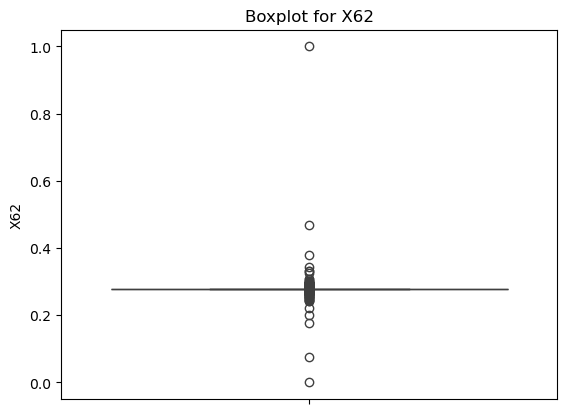

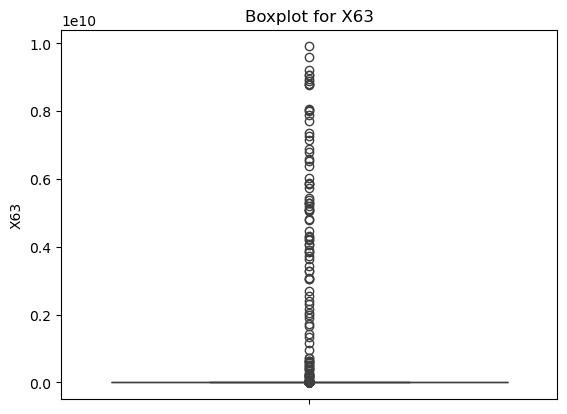

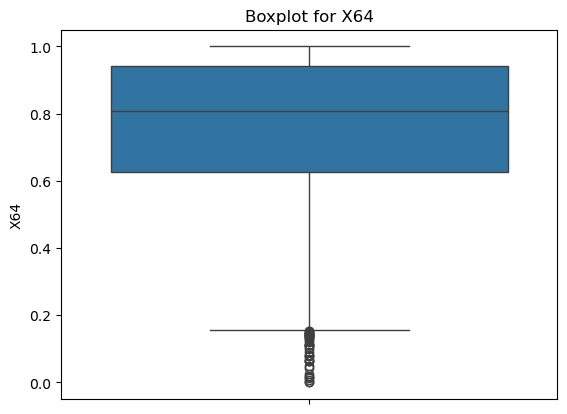

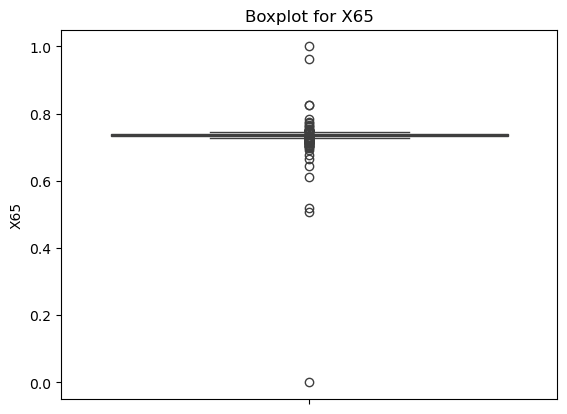

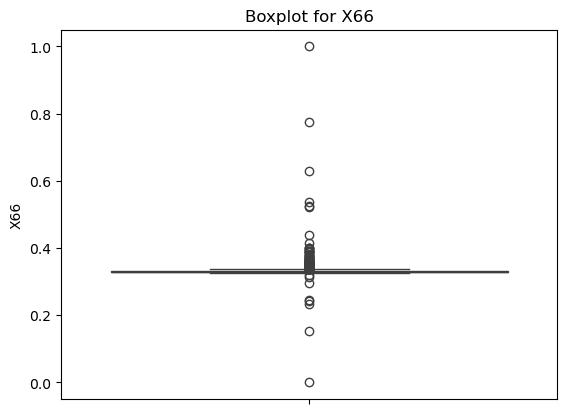

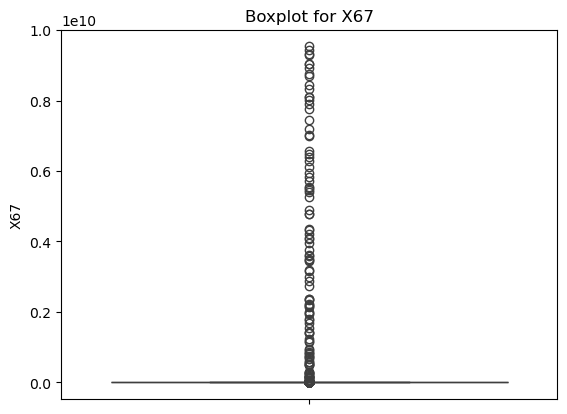

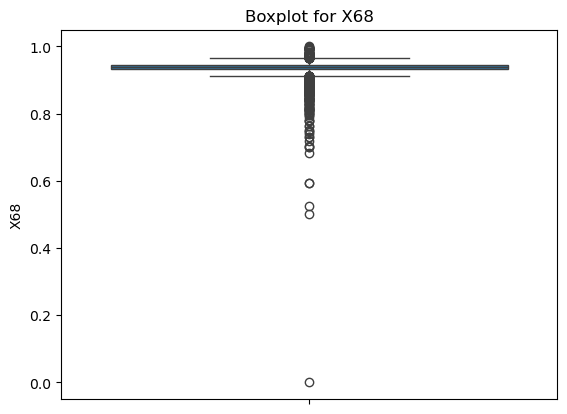

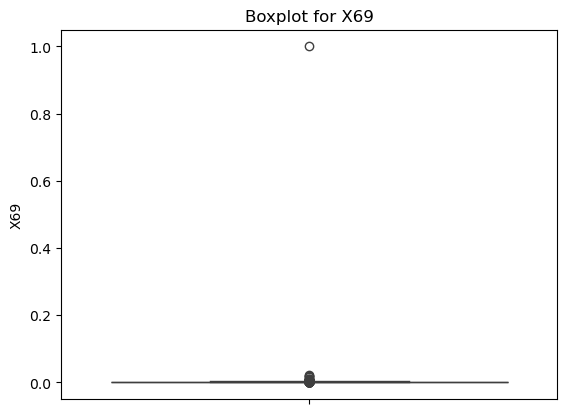

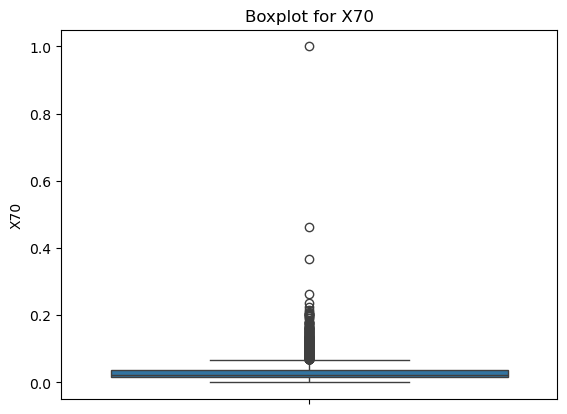

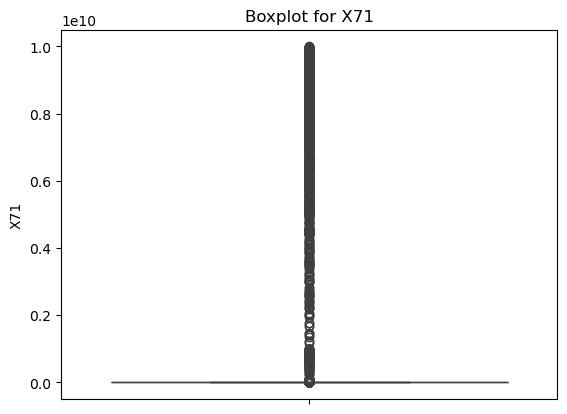

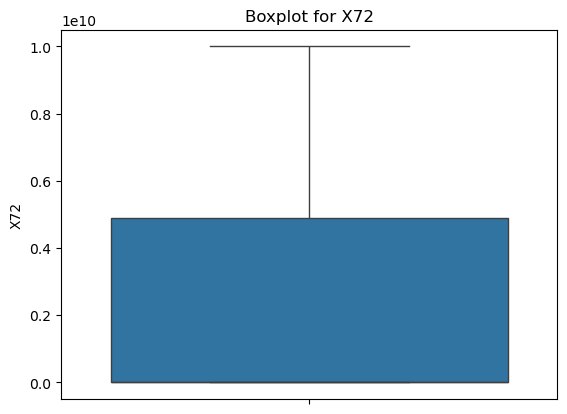

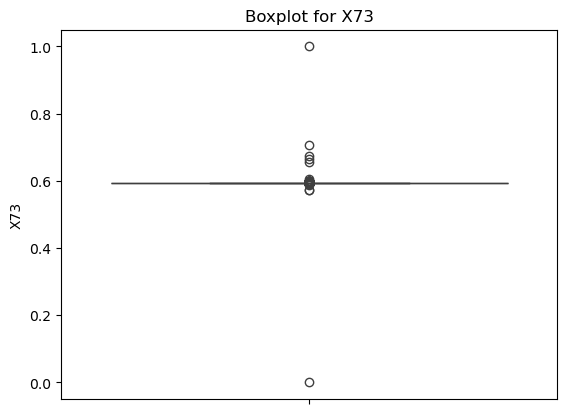

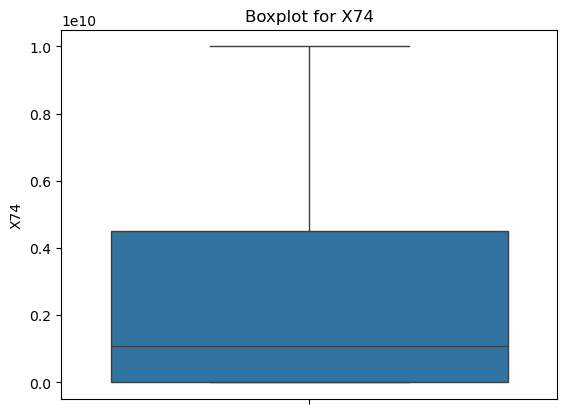

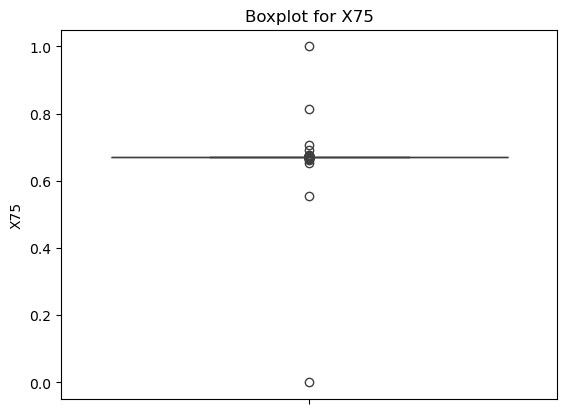

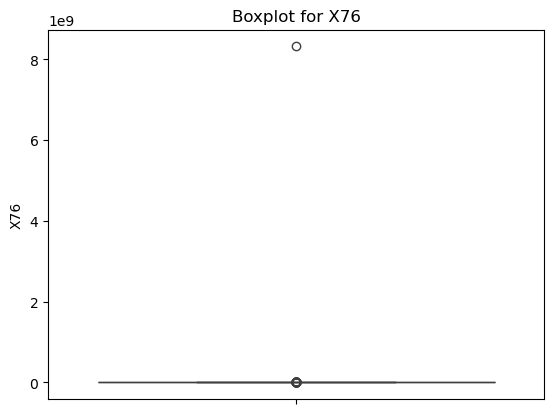

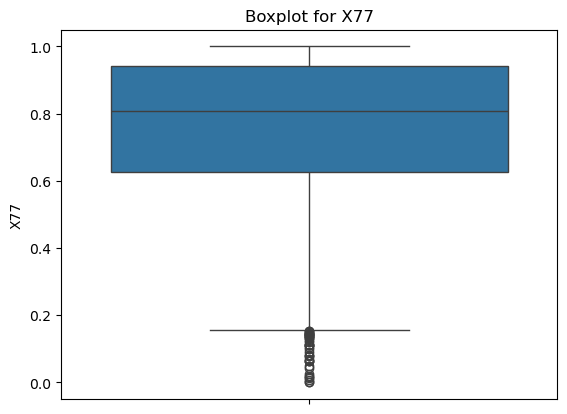

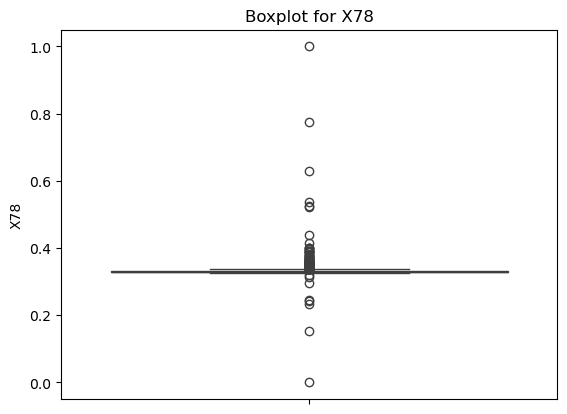

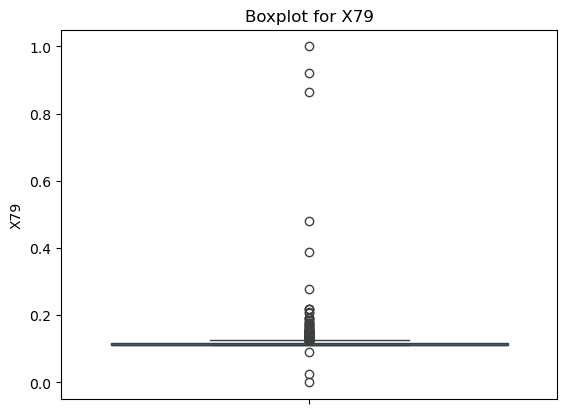

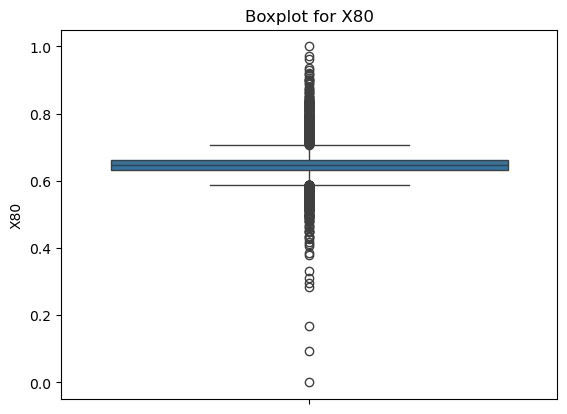

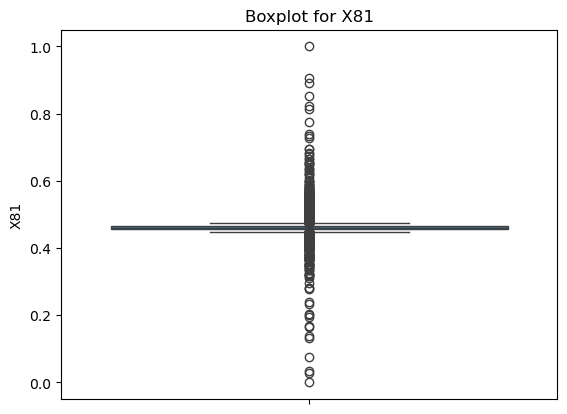

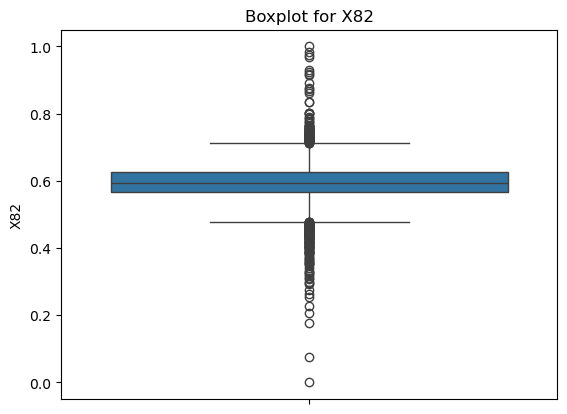

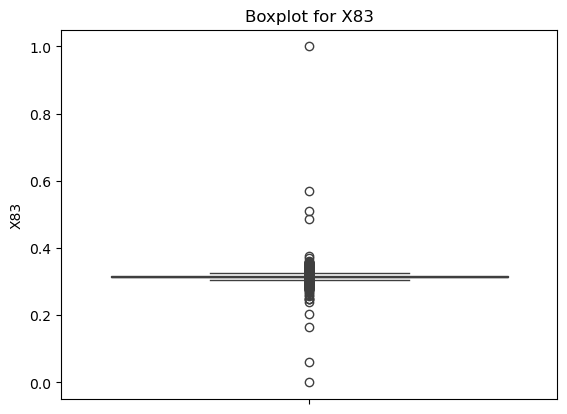

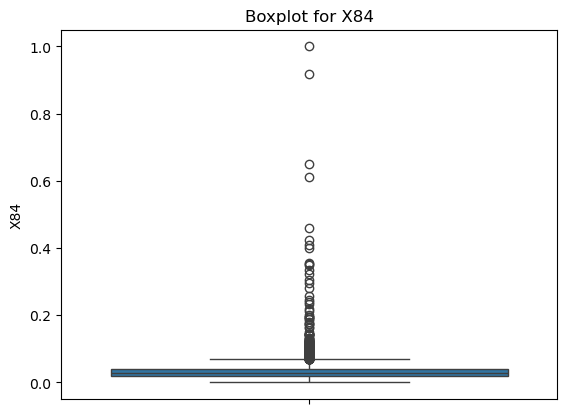

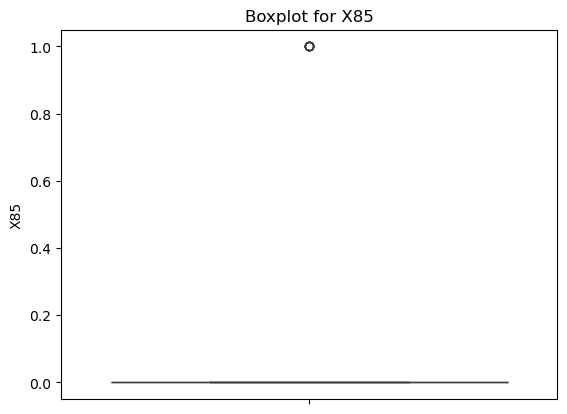

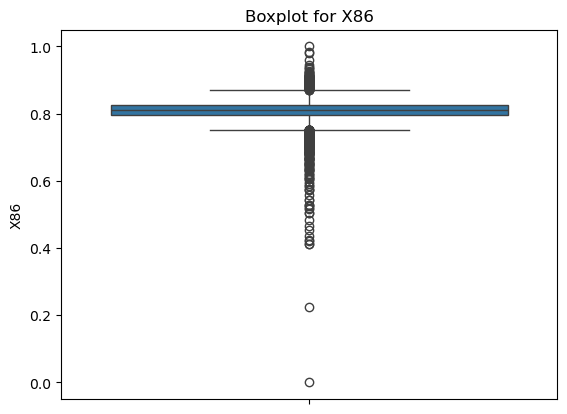

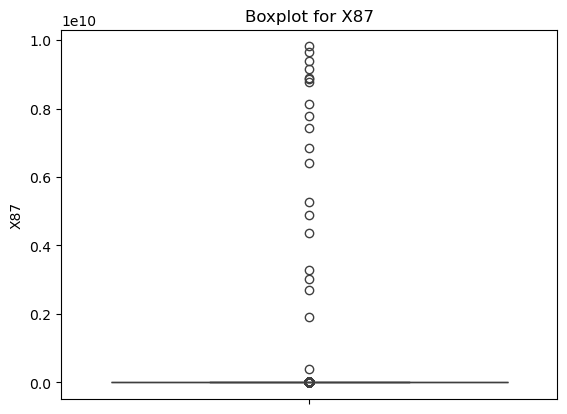

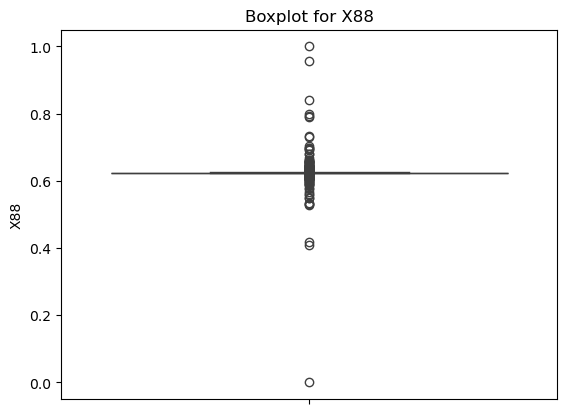

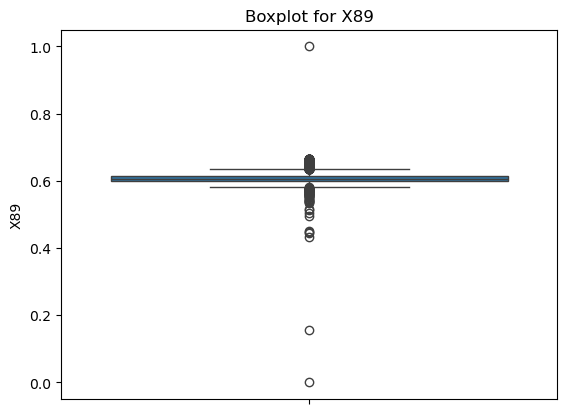

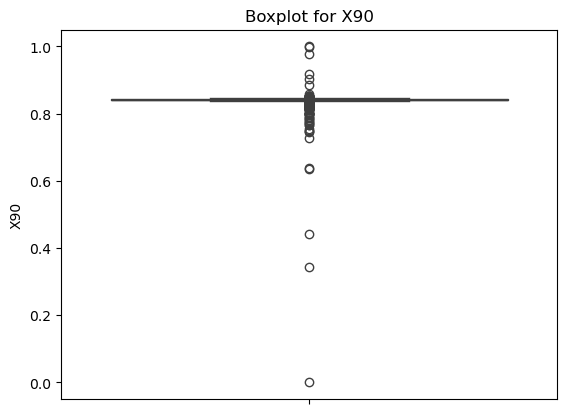

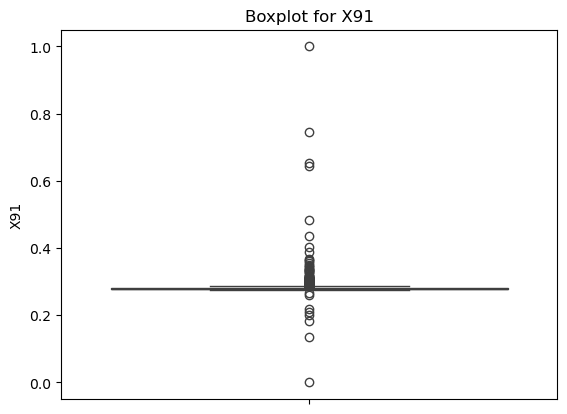

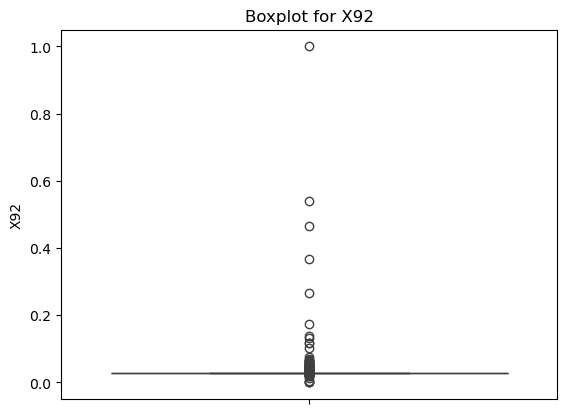

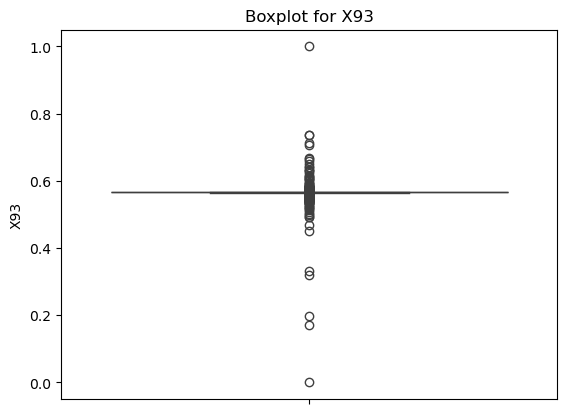

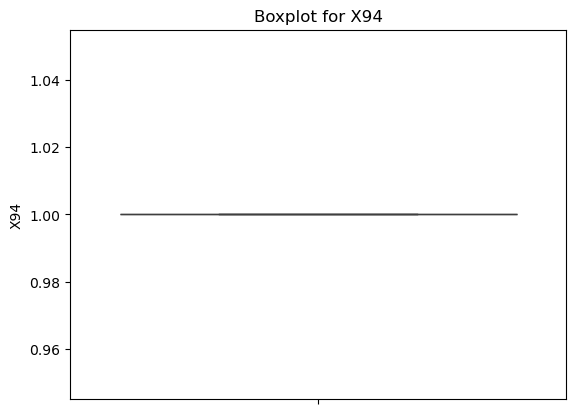

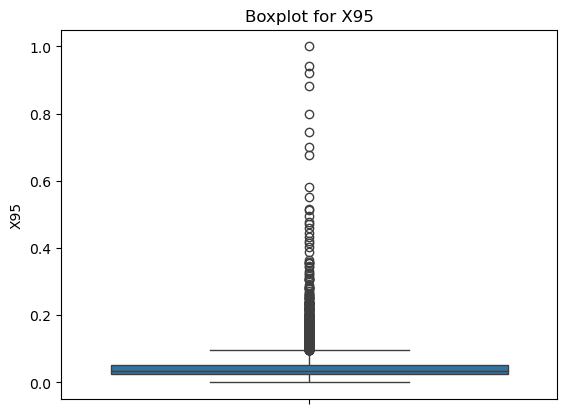

In [10]:
#Outlier Detection by boxplots
import seaborn as sns
import matplotlib.pyplot as plt

data=predictors
# Boxplot to visually inspect outliers
for column in data.select_dtypes(include=['float', 'int']).columns:
    sns.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [11]:
# Distribution of Standard deviation of variables

std_devs = data.select_dtypes(include=['float', 'int']).std()
high_std_vars = std_devs[std_devs > 1]

# Display the variables and their standard deviations
print("Variables with Standard Deviations > 1:")
print(high_std_vars)



Variables with Standard Deviations > 1:
X11    3.237684e+09
X12    2.598292e+09
X14    1.082750e+08
X21    5.170709e+07
X29    2.897718e+09
X30    1.141594e+08
X33    3.330216e+07
X34    2.446847e+08
X36    1.684069e+08
X46    2.782598e+08
X47    2.563589e+08
X48    3.247967e+09
X49    2.477557e+09
X51    1.366327e+08
X53    2.945063e+08
X58    1.716209e+08
X59    5.103509e+08
X63    5.820516e+08
X67    5.702706e+08
X71    2.821161e+09
X72    3.374944e+09
X74    2.938623e+09
X76    1.007542e+08
X87    3.764501e+08
dtype: float64


In [12]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(data.select_dtypes(include=['float']))

# Add the outlier labels to the dataset
data['Outlier'] = outlier_labels
outliers = data[data['Outlier'] == -1]
print("Outliers detected by Isolation Forest:")
print(outliers)

Outliers detected by Isolation Forest:
            X1        X2        X3        X4        X5        X6        X7  \
56    0.066933  0.057185  0.054821  0.601861  0.601861  0.998825  0.796779   
379   0.453956  0.516082  0.501740  0.665151  0.665151  0.996295  0.776710   
427   0.311315  0.279655  0.360887  0.598293  0.598293  0.998511  0.796186   
448   0.364842  0.318415  0.393115  0.494249  0.494249  0.996804  0.789248   
527   0.392385  0.432621  0.451470  0.555939  0.555939  0.998291  0.796273   
...        ...       ...       ...       ...       ...       ...       ...   
6645  0.556184  0.612843  0.600460  0.597025  0.597025  0.998998  0.797488   
6700  0.294252  0.353195  0.324268  0.621507  0.621507  0.998777  0.796607   
6731  0.507239  0.572830  0.559077  0.596225  0.596225  0.998978  0.797430   
6753  0.584849  0.652584  0.637936  0.621780  0.621780  0.999208  0.797689   
6818  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

            X8        X9

            X1        X2        X3        X4        X5        X6        X7  \
0     0.370594  0.424389  0.405750  0.601457  0.601457  0.998969  0.796887   
1     0.464291  0.538214  0.516730  0.610235  0.610235  0.998946  0.797380   
2     0.426071  0.499019  0.472295  0.601450  0.601364  0.998857  0.796403   
3     0.399844  0.451265  0.457733  0.583541  0.583541  0.998700  0.796967   
4     0.465022  0.538432  0.522298  0.598783  0.598783  0.998973  0.797366   
...        ...       ...       ...       ...       ...       ...       ...   
6814  0.493687  0.539468  0.543230  0.604455  0.604462  0.998992  0.797409   
6815  0.475162  0.538269  0.524172  0.598308  0.598308  0.998992  0.797414   
6816  0.472725  0.533744  0.520638  0.610444  0.610213  0.998984  0.797401   
6817  0.506264  0.559911  0.554045  0.607850  0.607850  0.999074  0.797500   
6818  0.493053  0.570105  0.549548  0.627409  0.627409  0.998080  0.801987   

            X8        X9       X10  ...       X88       X89    

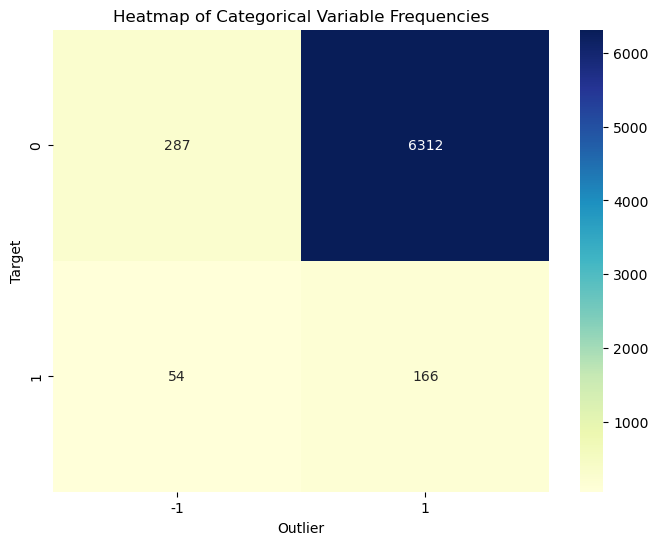

In [13]:
# Combine predictors and target
combined_data = data.copy()
combined_data['Target'] = target

print(combined_data)

# Create a contingency table
contingency_table = pd.crosstab(combined_data['Target'], combined_data['Outlier'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Categorical Variable Frequencies')
plt.xlabel('Outlier')
plt.ylabel('Target')
plt.show()


Frequency of Outliers per Variable:
     Outlier Frequency
X1                 391
X2                 561
X3                 432
X4                 320
X5                 318
..                 ...
X90                571
X91                404
X92               1503
X93               1421
X95                549

[93 rows x 1 columns]


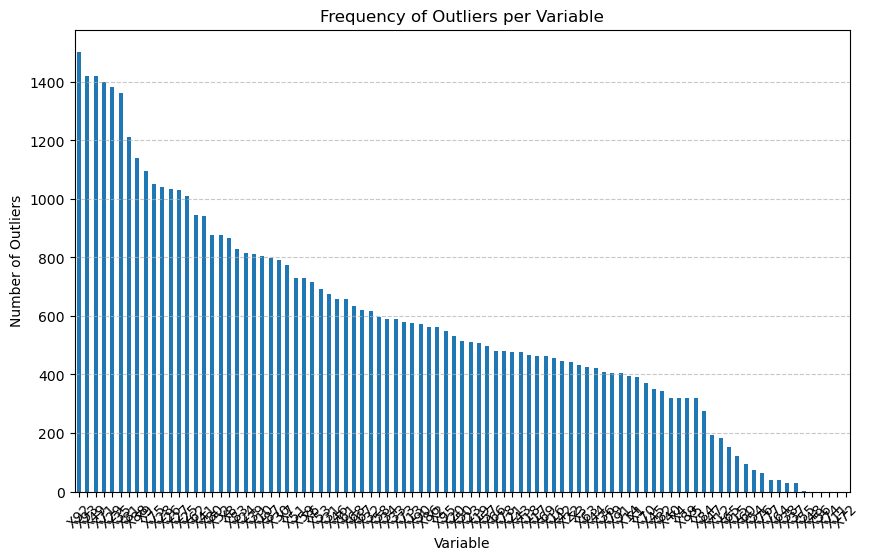

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the frequency of outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Apply the function to all numerical columns
outlier_frequencies = {}
for column in data.select_dtypes(include=['float']).columns:
    outlier_frequencies[column] = detect_outliers_iqr(data, column)

# Convert to a DataFrame for better readability
outlier_frequencies_df = pd.DataFrame.from_dict(outlier_frequencies, orient='index', columns=['Outlier Frequency'])

# Display the results
print("Frequency of Outliers per Variable:")
print(outlier_frequencies_df)

# Visualize the outlier frequencies
outlier_frequencies_df.sort_values(by='Outlier Frequency', ascending=False).plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Frequency of Outliers per Variable')
plt.xlabel('Variable')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [15]:
# Calculate the standard deviation of each column
std_deviation = predictors.std()

# Identify columns with std = 0
zero_std_columns = std_deviation[std_deviation == 0].index

# Drop these columns from the DataFrame
predictors = predictors.drop(columns=zero_std_columns)

# Print the remaining columns
print(f"Columns with non-zero standard deviation: {predictors.columns.tolist()}")
print(predictors.shape)

Columns with non-zero standard deviation: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X95', 'Outlier']
(6819, 95)


In [16]:
# number of Missing values in each column:
print(predictors.isnull().sum())

X1         0
X2         0
X3         0
X4         0
X5         0
          ..
X91        0
X92        0
X93        0
X95        0
Outlier    0
Length: 95, dtype: int64


In [17]:
# Calculate the correlation matrix
correlation_matrix = predictors.corr()
print(correlation_matrix)

               X1        X2        X3        X4        X5        X6        X7  \
X1       1.000000  0.940124  0.986849  0.334719  0.332755  0.035725  0.053419   
X2       0.940124  1.000000  0.955741  0.326969  0.324956  0.032053  0.053518   
X3       0.986849  0.955741  1.000000  0.333749  0.331755  0.035212  0.053726   
X4       0.334719  0.326969  0.333749  1.000000  0.999518  0.005745  0.032493   
X5       0.332755  0.324956  0.331755  0.999518  1.000000  0.005610  0.032232   
...           ...       ...       ...       ...       ...       ...       ...   
X91     -0.143629 -0.141039 -0.142838 -0.085434 -0.085407  0.001541 -0.004043   
X92     -0.016575 -0.011515 -0.014663 -0.011806 -0.011268  0.000935  0.000855   
X93      0.010573  0.013372  0.011473 -0.001167 -0.001158  0.000393  0.000984   
X95      0.052416  0.057887  0.056430  0.120029  0.120196 -0.017071 -0.014559   
Outlier  0.129093  0.168038  0.151356  0.016069  0.015612  0.087968  0.088615   

               X8        X9

In [18]:
# Define a correlation threshold
threshold = 0.85

# Find pairs of variables with correlation above the threshold
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid self-correlation and duplicate pairs
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Convert to a DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Display the high correlation pairs
print("Highly Correlated Pairs:")
print(high_corr_df)


Highly Correlated Pairs:
   Feature_1 Feature_2  Correlation
0         X1        X2     0.940124
1         X1        X3     0.986849
2         X1       X86     0.887670
3         X2        X3     0.955741
4         X2       X86     0.961552
5         X3       X86     0.912040
6         X4        X5     0.999518
7         X4       X89     1.000000
8         X5       X89     0.999518
9         X6        X7     0.916448
10        X6        X8     0.862191
11        X6       X10     0.915544
12        X7        X8     0.986379
13        X7       X10     0.993617
14        X8       X10     0.984452
15       X13       X61     0.880562
16       X16       X17     0.999342
17       X16       X18     0.999179
18       X17       X18     0.999837
19       X19       X22     0.876769
20       X19       X23     0.955591
21       X19       X42     0.873641
22       X19       X43     0.959461
23       X22       X23     0.861813
24       X22       X42     0.998696
25       X22       X43     0.886157
26 

In [19]:
#Removing completely correlated variables
Removed_predictors = predictors.drop(columns=['X77','X78','X37','X4'])

In [20]:
# Calculate the correlation matrix
Removed_correlation_matrix = Removed_predictors.corr()
print(Removed_correlation_matrix)

               X1        X2        X3        X5        X6        X7        X8  \
X1       1.000000  0.940124  0.986849  0.332755  0.035725  0.053419  0.049222   
X2       0.940124  1.000000  0.955741  0.324956  0.032053  0.053518  0.049474   
X3       0.986849  0.955741  1.000000  0.331755  0.035212  0.053726  0.049952   
X5       0.332755  0.324956  0.331755  1.000000  0.005610  0.032232  0.026851   
X6       0.035725  0.032053  0.035212  0.005610  1.000000  0.916448  0.862191   
...           ...       ...       ...       ...       ...       ...       ...   
X91     -0.143629 -0.141039 -0.142838 -0.085407  0.001541 -0.004043 -0.004390   
X92     -0.016575 -0.011515 -0.014663 -0.011268  0.000935  0.000855  0.000927   
X93      0.010573  0.013372  0.011473 -0.001158  0.000393  0.000984  0.000957   
X95      0.052416  0.057887  0.056430  0.120196 -0.017071 -0.014559 -0.010900   
Outlier  0.129093  0.168038  0.151356  0.015612  0.087968  0.088615  0.088797   

               X9       X10

In [21]:
print(Removed_predictors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 91 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X1       6819 non-null   float64
 1   X2       6819 non-null   float64
 2   X3       6819 non-null   float64
 3   X5       6819 non-null   float64
 4   X6       6819 non-null   float64
 5   X7       6819 non-null   float64
 6   X8       6819 non-null   float64
 7   X9       6819 non-null   float64
 8   X10      6819 non-null   float64
 9   X11      6819 non-null   float64
 10  X12      6819 non-null   float64
 11  X13      6819 non-null   float64
 12  X14      6819 non-null   float64
 13  X15      6819 non-null   float64
 14  X16      6819 non-null   float64
 15  X17      6819 non-null   float64
 16  X18      6819 non-null   float64
 17  X19      6819 non-null   float64
 18  X20      6819 non-null   float64
 19  X21      6819 non-null   float64
 20  X22      6819 non-null   float64
 21  X23      6819 

# Fore different approach
### 1. put all variables in the models
### 2. Define some financial variables based on these and put the defined ones
### 3. Use PCA and reduce the dimentional of the features and put components in the models
### 4. Selecting Features by Random Forest
### 5. T-test

In [22]:
# Defined Variables
from itertools import zip_longest

pdf=df.drop(columns=['Bankrupt?'])

list1 = pdf.columns.tolist()
list2 = [f"X{i+1}" for i in range(pdf.shape[1])]

for item1, item2 in zip_longest(list1, list2, fillvalue="N/A"):
    print(f"{item1:<10}{item2:<10}")


 ROA(C) before interest and depreciation before interestX1        
 ROA(A) before interest and % after taxX2        
 ROA(B) before interest and depreciation after taxX3        
 Operating Gross MarginX4        
 Realized Sales Gross MarginX5        
 Operating Profit RateX6        
 Pre-tax net Interest RateX7        
 After-tax net Interest RateX8        
 Non-industry income and expenditure/revenueX9        
 Continuous interest rate (after tax)X10       
 Operating Expense RateX11       
 Research and development expense rateX12       
 Cash flow rateX13       
 Interest-bearing debt interest rateX14       
 Tax rate (A)X15       
 Net Value Per Share (B)X16       
 Net Value Per Share (A)X17       
 Net Value Per Share (C)X18       
 Persistent EPS in the Last Four SeasonsX19       
 Cash Flow Per ShareX20       
 Revenue Per Share (Yuan ¥)X21       
 Operating Profit Per Share (Yuan ¥)X22       
 Per Share Net profit before tax (Yuan ¥)X23       
 Realized Sales Gross Profit Grow

In [24]:
# Profitability Ratios

definedvaradded=pd.DataFrame()
definedvaradded['ROE'] = Removed_predictors['X90']  # Net Income to Stockholder's Equity
definedvaradded['EBITDA_Margin'] = (Removed_predictors['X6']) / Removed_predictors['X21']  # Operating Profit Rate / Revenue Per Share (Yuan ¥)
definedvaradded['Net_Profit_Margin'] = Removed_predictors['X86'] / Removed_predictors['X45']  # Net Income to Total Assets / Total Asset Turnover
definedvaradded['Gross_Profit_Margin'] = Removed_predictors['X89'] / Removed_predictors['X5']  # Gross Profit to Sales / Realized Sales Gross Margin

# Liquidity Ratios
definedvaradded['Cash_Ratio'] = Removed_predictors['X59']  # Cash/Current Liability
definedvaradded['Working_Capital_Ratio'] = Removed_predictors['X54']  # Working Capital to Total Assets
definedvaradded['Liquidity_Index'] = (Removed_predictors['X58']) / Removed_predictors['X33']  # Quick Assets/Current Liability / Current Ratio

# Leverage Ratios
definedvaradded['Debt_to_Equity_Ratio'] = Removed_predictors['X36'] / Removed_predictors['X38']  # Total debt/Total net worth / Net worth/Assets
definedvaradded['Long_Term_Debt_Ratio'] = Removed_predictors['X67'] / Removed_predictors['X45']  # Long-term Liability to Current Assets / Total Asset Turnover
definedvaradded['Interest_Coverage_Ratio'] = Removed_predictors['X93'] / Removed_predictors['X35']  # Interest Coverage Ratio (Interest expense to EBIT) / Interest Expense Ratio

# Efficiency Ratios
definedvaradded['Inventory_Turnover_Days'] = 365 / Removed_predictors['X48']  # 365 / Inventory Turnover Rate (times)
definedvaradded['Accounts_Receivable_Collection_Period'] = 365 / Removed_predictors['X46']  # 365 / Accounts Receivable Turnover
definedvaradded['Fixed_Asset_Utilization'] = Removed_predictors['X49'] / Removed_predictors['X50']  # Fixed Assets Turnover Frequency / Net Worth Turnover Rate (times)

# Growth Ratios
definedvaradded['Revenue_Growth_Rate'] = Removed_predictors['X24'] / Removed_predictors['X21']  # Realized Sales Gross Profit Growth Rate / Revenue Per Share (Yuan ¥)
definedvaradded['Operating_Profit_Growth_Rate'] = Removed_predictors['X25'] / Removed_predictors['X22']  # Operating Profit Growth Rate / Operating Profit Per Share (Yuan ¥)

# Solvency Ratios
#Removed_predictors['Asset_to_Debt_Ratio'] = Removed_predictors['X38'] / Removed_predictors['X37']  # Net worth/Assets / Debt ratio %
#Removed_predictors['Cash_Flow_to_Debt'] = Removed_predictors['X81'] / Removed_predictors['X85']  # Cash Flow to Liability / Liability-Assets Flag

# Performance Ratios
definedvaradded['Asset_Utilization_Efficiency'] = Removed_predictors['X87'] / Removed_predictors['X45']  # Total assets to GNP price / Total Asset Turnover
definedvaradded['Capital_Efficiency'] = Removed_predictors['X43'] / Removed_predictors['X42']  # Net profit before tax/Paid-in capital / Operating profit/Paid-in capital

# Preview the resulting DataFrame
print(definedvaradded.head())


        ROE  EBITDA_Margin  Net_Profit_Margin  Gross_Profit_Margin  \
0  0.827890      56.889618           8.243721             0.999993   
1  0.839969      47.244143          12.336353             1.000002   
2  0.836774     168.044406          51.670469             1.000143   
3  0.834697      69.506349           8.221381             0.999994   
4  0.839973      33.647023           4.532270             0.999997   

     Cash_Ratio  Working_Capital_Ratio  Liquidity_Index  Debt_to_Equity_Ratio  \
0  1.473360e-04               0.672775         0.883932              0.026837   
1  1.383910e-03               0.751111         0.687481              0.015085   
2  5.340000e+09               0.829502         0.546021              0.026811   
3  1.010646e-03               0.725754         0.706055              0.011281   
4  6.804636e-04               0.751822         0.709806              0.005763   

   Long_Term_Debt_Ratio  Interest_Coverage_Ratio  Inventory_Turnover_Days  \
0              

In [35]:
Removed_predictors.head()

,X1,X2,X3,X5,X6,X7,X8,X9,X10,X11,...,X86,X87,X88,X89,X90,X91,X92,X93,X95,Outlier
0,0.370594,0.424389,0.405750,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [42]:
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data= Removed_predictors.drop(columns=['Outlier'])

# Step 1: Standardize the data (PCA works better with standardized data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_data = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

# Step 4: Explain Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratio for Each Component:")
print(explained_variance)
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Optional: Add PCA components back to the original dataset
data_pca = pd.concat([data.reset_index(drop=True), pca_df], axis=1)

# Save or display the PCA results
print("DataFrame after PCA:")
pca_df.head()


Explained Variance Ratio for Each Component:
[0.13410695 0.0645518  0.04752262 0.04522877 0.04335571 0.03261283
 0.03105628 0.0295987  0.02429113 0.02211259 0.02101825 0.0201088
 0.01680435 0.01648626 0.01623645 0.0157156  0.01506311 0.01420837
 0.01360025 0.01321776 0.01293621 0.0124447  0.01180121 0.01157443
 0.01154401 0.01131631 0.01122314 0.01118571 0.01115853 0.01092053
 0.01079328 0.01064477 0.01063222 0.0104681  0.01026448 0.01012225
 0.01006881 0.00983063 0.00953186 0.0093829  0.00919818 0.00912158
 0.0088625  0.00881565 0.00823282 0.00787688 0.00756894 0.00721293
 0.0062865  0.00622948 0.00597909 0.00594218 0.00534455]

Cumulative Explained Variance:
[0.13410695 0.19865875 0.24618137 0.29141014 0.33476585 0.36737867
 0.39843495 0.42803365 0.45232479 0.47443737 0.49545562 0.51556442
 0.53236877 0.54885503 0.56509148 0.58080709 0.59587019 0.61007857
 0.62367881 0.63689657 0.64983279 0.66227748 0.67407869 0.68565313
 0.69719714 0.70851345 0.71973658 0.73092229 0.74208082 0.75300

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,-7.103553,0.701326,-0.690654,-0.621796,0.768014,1.089171,0.354233,0.351208,1.739177,1.700831,...,0.193031,-1.399707,-0.344207,0.145730,-0.192354,0.310633,0.245096,0.314524,0.677883,0.040918
1,-2.573896,-0.677168,-2.232905,-0.672566,1.714187,0.064308,0.396601,0.347495,0.753522,0.132789,...,0.060277,-0.261255,-0.488831,0.018781,-0.190311,-0.360591,0.139801,0.189303,0.814913,-0.425375
2,-4.039121,-0.295945,-0.214322,-0.052009,0.335778,-0.694654,-0.073777,-0.271234,0.175184,1.013394,...,-0.735391,1.028007,-0.288400,-0.827024,-0.660844,-0.770025,0.068128,-0.412949,0.514335,-0.731801
3,-5.676429,-0.890374,-1.877745,-0.715350,1.644265,1.148120,0.777757,0.553197,-0.211164,0.579703,...,0.472362,1.546004,-0.814564,-0.818686,0.810140,0.011105,-0.678353,-0.871670,-0.394857,-0.798656
4,-2.373837,0.038625,0.194126,-0.985623,0.972471,0.651210,0.664947,0.459284,-0.588565,-0.369618,...,0.179852,-0.538154,1.143264,0.094734,-0.528516,0.282007,0.415693,-0.013646,-0.658998,0.351253


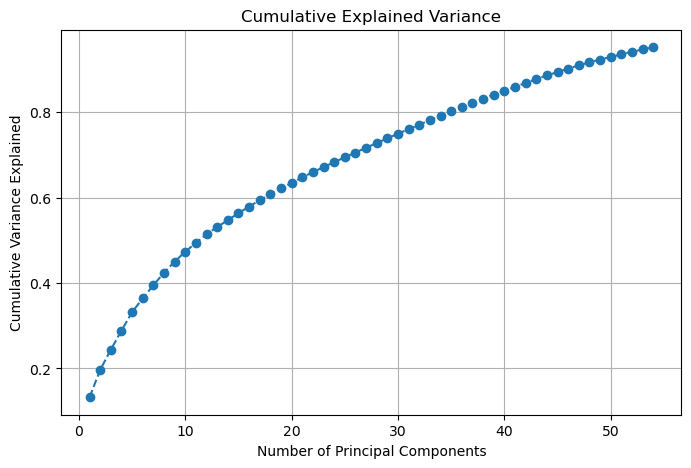

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()


# Balancing the classes

In [36]:
#note that do not apply SMOTE on the test set. Balancing is only for training data to prevent data leakage.
!pip install imbalanced-learn

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = Removed_predictors
y = target

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the results
print("Original Class Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

print("\nBalanced Class Distribution in Training Data:")
print(pd.Series(y_train_balanced).value_counts())

print("\nShape of Balanced Data:")
print(f"Features: {X_train_balanced.shape}, Target: {y_train_balanced.shape}")


Original Class Distribution in Training Data:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Balanced Class Distribution in Training Data:
Bankrupt?
0    5279
1    5279
Name: count, dtype: int64

Shape of Balanced Data:
Features: (10558, 90), Target: (10558,)


In [38]:
#ADASYN (Adaptive Synthetic Sampling): good for high dimensional data (many features)

from imblearn.over_sampling import ADASYN

# Apply ADASYN 
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Display the results
print("Original Class Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

print("\nBalanced Class Distribution in Training Data:")
print(pd.Series(y_train_balanced).value_counts())

print("\nShape of Balanced Data:")
print(f"Features: {X_train_balanced.shape}, Target: {y_train_balanced.shape}")


Original Class Distribution in Training Data:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Balanced Class Distribution in Training Data:
Bankrupt?
1    5305
0    5279
Name: count, dtype: int64

Shape of Balanced Data:
Features: (10584, 90), Target: (10584,)


# 4. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# balanced train data based on the balancing method we want to choose
X_train_balanced 
y_train_balanced

# Random Forest for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Get feature importance
feature_importances = rf.feature_importances_

# Step 5: Select Top Features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top N features (e.g., top 5)
top_features = importance_df['Feature'].head(5).tolist()

# Step 6: Use only top features in your dataset
X_selected = X[top_features]

# Display results
print("Feature Importances:")
print(importance_df)

print("\nTop Selected Features:")
print(top_features)

print("\nDataset with Selected Features:")
print(X_selected.head())


Feature Importances:
   Feature  Importance
8      X10    0.067619
6       X8    0.058767
34     X36    0.055131
5       X7    0.041615
81     X86    0.040387
..     ...         ...
77     X82    0.002591
47     X50    0.002579
58     X61    0.002520
11     X13    0.002496
80     X85    0.000002

[90 rows x 2 columns]

Top Selected Features:
['X10', 'X8', 'X36', 'X7', 'X86']

Dataset with Selected Features:
        X10        X8       X36        X7       X86
0  0.780985  0.808809  0.021266  0.796887  0.716845
1  0.781506  0.809301  0.012502  0.797380  0.795297
2  0.780284  0.808388  0.021248  0.796403  0.774670
3  0.781241  0.808966  0.009572  0.796967  0.739555
4  0.781550  0.809304  0.005150  0.797366  0.795016


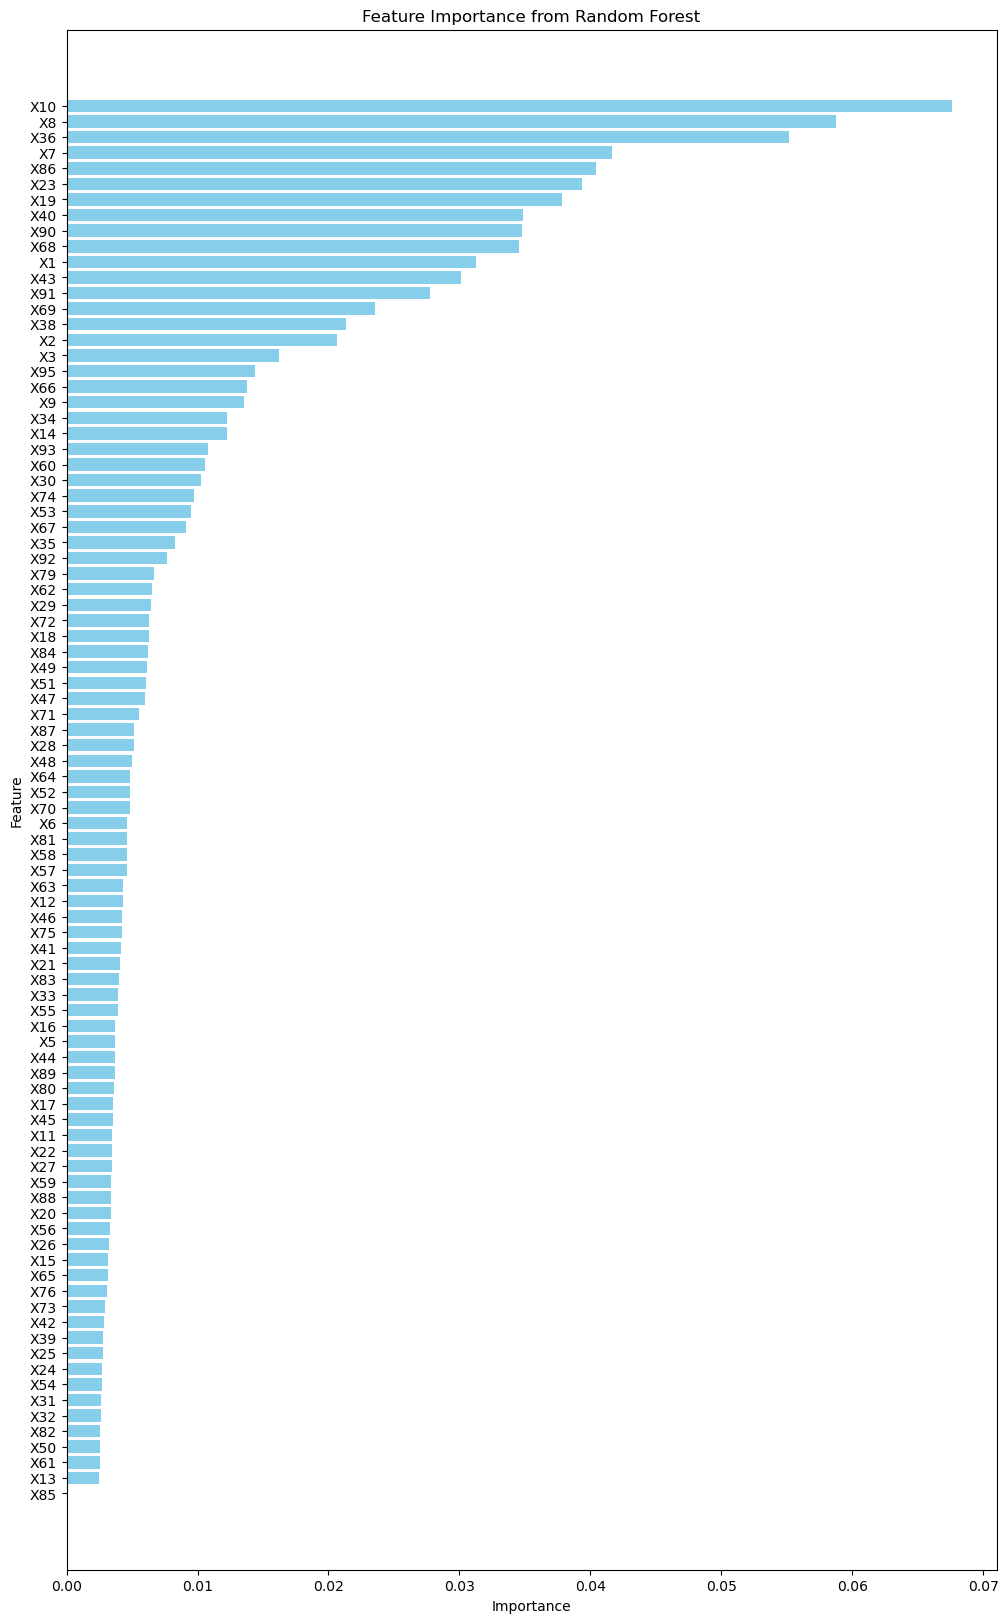

In [40]:

# Plot feature importances
plt.figure(figsize=(12, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [42]:
#Random Forest on PCA data
    # Balance the data

X = pd.DataFrame(pca_data)
y = target

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the results
print("Original Class Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

print("\nBalanced Class Distribution in Training Data:")
print(pd.Series(y_train_balanced).value_counts())

print("\nShape of Balanced Data:")
print(f"Features: {X_train_balanced.shape}, Target: {y_train_balanced.shape}")



Original Class Distribution in Training Data:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Balanced Class Distribution in Training Data:
Bankrupt?
0    5279
1    5279
Name: count, dtype: int64

Shape of Balanced Data:
Features: (10558, 53), Target: (10558,)


In [43]:
# Random Forest for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Get feature importance
feature_importances = rf.feature_importances_

# Step 5: Select Top Features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top N features (e.g., top 5)
top_features = importance_df['Feature'].head(5).tolist()

# Step 6: Use only top features in your dataset
X_selected = X[top_features]

# Display results
print("Feature Importances:")
print(importance_df)

print("\nTop Selected Features:")
print(top_features)

print("\nDataset with Selected Features:")
print(X_selected.head())

Feature Importances:
    Feature  Importance
0         0    0.226420
9         9    0.085175
33       33    0.035529
14       14    0.033408
8         8    0.031343
13       13    0.031059
1         1    0.026667
46       46    0.024736
20       20    0.023748
5         5    0.019528
10       10    0.018216
24       24    0.016400
15       15    0.015508
18       18    0.015130
3         3    0.015049
2         2    0.014650
6         6    0.014522
44       44    0.014113
11       11    0.013070
16       16    0.012946
32       32    0.012702
52       52    0.012352
22       22    0.011744
28       28    0.011284
31       31    0.011275
38       38    0.010980
23       23    0.010796
43       43    0.010635
4         4    0.010337
42       42    0.009901
12       12    0.009743
30       30    0.009732
25       25    0.009543
19       19    0.009522
36       36    0.009470
34       34    0.009387
17       17    0.009382
26       26    0.009314
27       27    0.009095
51       51    0.00

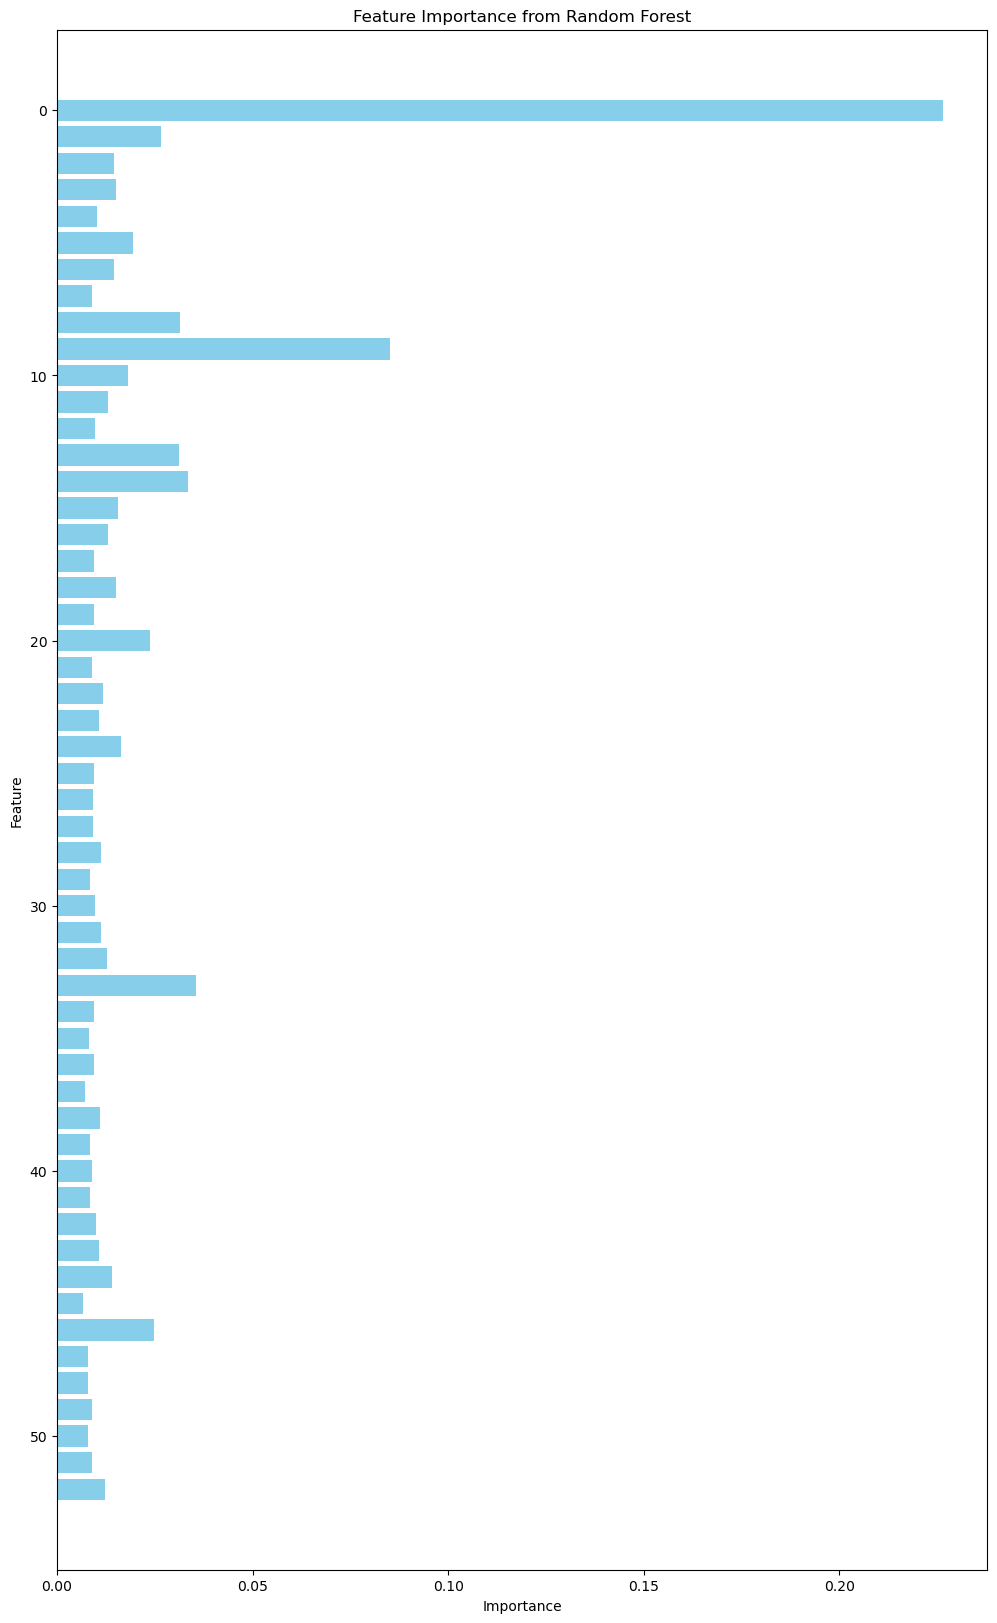

In [44]:

# Plot feature importances
plt.figure(figsize=(12, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [45]:
# Descriptive Analysis: plots

predictors = Removed_predictors

# Combine predictors and target
combined_df = predictors.copy()
combined_df['Target'] = target

# Display the combined DataFrame
print(combined_df.head())

         X1        X2        X3        X5        X6        X7        X8   
0  0.370594  0.424389  0.405750  0.601457  0.998969  0.796887  0.808809  \
1  0.464291  0.538214  0.516730  0.610235  0.998946  0.797380  0.809301   
2  0.426071  0.499019  0.472295  0.601364  0.998857  0.796403  0.808388   
3  0.399844  0.451265  0.457733  0.583541  0.998700  0.796967  0.808966   
4  0.465022  0.538432  0.522298  0.598783  0.998973  0.797366  0.809304   

         X9       X10           X11  ...       X86       X87       X88   
0  0.302646  0.780985  1.256969e-04  ...  0.716845  0.009219  0.622879  \
1  0.303556  0.781506  2.897851e-04  ...  0.795297  0.008323  0.623652   
2  0.302035  0.780284  2.361297e-04  ...  0.774670  0.040003  0.623841   
3  0.303350  0.781241  1.078888e-04  ...  0.739555  0.003252  0.622929   
4  0.303475  0.781550  7.890000e+09  ...  0.795016  0.003878  0.623521   

        X89       X90       X91       X92       X93       X95  Target  
0  0.601453  0.827890  0.290202 

# Using T-Test to find unimportant features

In [43]:
#Search for variable names

list1 = pdf.columns.tolist()
list2 = [f"X{i+1}" for i in range(pdf.shape[1])]

xi_to_names = dict(zip(list2, list1))

# Example: Find the variable name for X1
search_label = "X1"
if search_label in xi_to_names:
    print(f"{search_label} corresponds to: {xi_to_names[search_label]}")
else:
    print(f"{search_label} not found in the mapping.")
    

X1 corresponds to:  ROA(C) before interest and depreciation before interest


In [44]:
data=combined_df
data.select_dtypes(include=['float']).columns.shape

NameError: name 'combined_df' is not defined

In [62]:
# t-test for difference between classes
from scipy.stats import ttest_ind

X_balanced, y_balanced = smote.fit_resample(Removed_predictors, target)

# Combine predictors and target
data = X_balanced.copy()
data['Target'] = y_balanced

# T-Test Function
def perform_t_tests(df, target, alpha=0.05):
    numerical_features = df.select_dtypes(include=['float', 'int']).columns
    t_test_results = []

    for feature in numerical_features:
        if feature == target:  # Skip the target variable itself
            continue
        
        # Separate data into two groups based on target variable
        group1 = df[df[target] == 0][feature]
        group2 = df[df[target] == 1][feature]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
        
        # Store results
        t_test_results.append({
            'Feature': feature,
            'T-Statistic': t_stat,
            'P-Value': p_value,
            'Significant': p_value < alpha  # True if p-value is below alpha
        })

    return pd.DataFrame(t_test_results)

# Perform t-tests
t_test_results = perform_t_tests(data, target='Target')
print(t_test_results)


   Feature  T-Statistic        P-Value  Significant
0       X1    81.831702   0.000000e+00         True
1       X2    78.329163   0.000000e+00         True
2       X3    80.618068   0.000000e+00         True
3       X5    39.430899   0.000000e+00         True
4       X6     0.137026   8.910148e-01        False
..     ...          ...            ...          ...
85     X90    19.916283   8.833623e-86         True
86     X91   -21.098960   8.706245e-96         True
87     X92    -2.655203   7.936728e-03         True
88     X93     0.802506   4.222818e-01        False
89     X95    31.991855  9.238810e-216         True

[90 rows x 4 columns]


In [63]:
# Identify non-significant variables (False significants)
non_significant_vars = t_test_results[t_test_results['Significant'] == False]['Feature'].tolist()

# Display the results
print("Non-Significant Variables (False Significants):")
print(non_significant_vars)


Non-Significant Variables (False Significants):
['X6', 'X24', 'X33', 'X39', 'X53', 'X58', 'X62', 'X63', 'X73', 'X75', 'X85', 'X93']


# Clustering

In [88]:
definedvaradded

,ROE,EBITDA_Margin,Net_Profit_Margin,Gross_Profit_Margin,Cash_Ratio,Working_Capital_Ratio,Liquidity_Index,Debt_to_Equity_Ratio,Long_Term_Debt_Ratio,Interest_Coverage_Ratio,Inventory_Turnover_Days,Accounts_Receivable_Collection_Period,Fixed_Asset_Utilization,Revenue_Growth_Rate,Operating_Profit_Growth_Rate,Asset_Utilization_Efficiency,Capital_Efficiency
0,0.827890,56.889618,8.243721,0.999993,1.473360e-04,0.672775,0.883932,0.026837,2.943122e-01,0.895387,2.004475e+06,2.012256e+05,3.540706e-03,1.258688,8.842685,0.106024,1.436696
1,0.839969,47.244143,12.336353,1.000002,1.383910e-03,0.751111,0.687481,0.015085,3.714541e-01,0.897669,3.899573e-08,2.837472e+05,2.821392e+10,1.044259,9.048972,0.129108,1.802384
2,0.836774,168.044406,51.670469,1.000143,5.340000e+09,0.829502,0.546021,0.026811,2.477982e-01,0.895295,5.615385e-06,2.440919e+05,1.979518e+11,3.829082,9.184694,2.668190,1.603532
3,0.834697,69.506349,8.221381,0.999994,1.010646e-03,0.725754,0.706055,0.011281,2.464031e-01,0.895966,5.119215e-08,1.856509e+05,3.260345e+11,1.534337,10.905084,0.036157,1.898439
4,0.839973,33.647023,4.532270,0.999997,6.804636e-04,0.751822,0.709806,0.005763,0.000000e+00,0.904979,2.234227e+06,2.519548e+05,7.308558e-03,0.744226,8.754167,0.022105,1.727701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.840359,48.106598,7.732628,0.999987,5.071548e-03,0.817769,0.523342,0.007603,1.732495e-02,0.896705,9.057072e-06,5.291051e+05,5.124070e-03,1.077411,8.637479,0.004500,1.742087
6815,0.840306,43.340136,7.730902,0.999997,4.727181e-03,0.793387,0.733289,0.005133,2.131183e-02,0.896323,3.672032e-08,5.569527e+05,2.207193e-02,0.961359,8.602224,0.018939,1.742938
6816,0.840138,22.573430,7.494619,1.000372,8.821248e-02,0.866047,0.924726,0.001448,0.000000e+00,0.896206,1.304825e+06,2.417953e+05,4.568811e-02,0.498665,8.473566,0.026679,1.721106
6817,0.841084,31.681420,7.417478,0.999994,7.133218e-03,0.832340,0.606557,0.004180,2.923836e+10,0.896264,8.021978e-08,5.096196e+05,8.547977e-03,0.708734,7.639299,0.025923,1.633500


In [104]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Combine predictors and target
combined_definedvaradded = definedvaradded.copy()
combined_definedvaradded['Target'] = target

print("Checking for missing or infinite values:")
print(combined_definedvaradded.isnull().sum())  # Check for NaN
print(np.isinf(combined_definedvaradded).sum())  # Check for inf

# Replace or drop invalid values
combined_definedvaradded = combined_definedvaradded.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
combined_definedvaradded = combined_definedvaradded.dropna()  # Drop rows with NaN values
combined_definedvaradded1 = combined_definedvaradded.drop(columns=['Target'])

print(combined_definedvaradded1.shape)

#Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_definedvaradded1)

#Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_definedvaradded1['Cluster'] = kmeans.fit_predict(data_scaled)

# Add cluster labels and check results
print("Clustered Data:")
print(combined_definedvaradded1.head())

Checking for missing or infinite values:
ROE                                      0
EBITDA_Margin                            1
Net_Profit_Margin                        0
Gross_Profit_Margin                      1
Cash_Ratio                               0
Working_Capital_Ratio                    0
Liquidity_Index                          0
Debt_to_Equity_Ratio                     0
Long_Term_Debt_Ratio                     4
Interest_Coverage_Ratio                  0
Inventory_Turnover_Days                  0
Accounts_Receivable_Collection_Period    0
Fixed_Asset_Utilization                  0
Revenue_Growth_Rate                      0
Operating_Profit_Growth_Rate             0
Asset_Utilization_Efficiency             0
Capital_Efficiency                       0
Target                                   0
dtype: int64
ROE                                      0
EBITDA_Margin                            1
Net_Profit_Margin                        8
Gross_Profit_Margin                      0


C:\ProgramData\Anaconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustered Data:
        ROE  EBITDA_Margin  Net_Profit_Margin  Gross_Profit_Margin   
0  0.827890      56.889618           8.243721             0.999993  \
1  0.839969      47.244143          12.336353             1.000002   
2  0.836774     168.044406          51.670469             1.000143   
3  0.834697      69.506349           8.221381             0.999994   
4  0.839973      33.647023           4.532270             0.999997   

     Cash_Ratio  Working_Capital_Ratio  Liquidity_Index  Debt_to_Equity_Ratio   
0  1.473360e-04               0.672775         0.883932              0.026837  \
1  1.383910e-03               0.751111         0.687481              0.015085   
2  5.340000e+09               0.829502         0.546021              0.026811   
3  1.010646e-03               0.725754         0.706055              0.011281   
4  6.804636e-04               0.751822         0.709806              0.005763   

   Long_Term_Debt_Ratio  Interest_Coverage_Ratio  Inventory_Turnover_Days   

In [105]:
# Combine Cluster and target
cluster_df = combined_definedvaradded1.copy()
cluster_df['Target'] = combined_definedvaradded['Target'] 
print(cluster_df)

           ROE  EBITDA_Margin  Net_Profit_Margin  Gross_Profit_Margin   
0     0.827890      56.889618           8.243721             0.999993  \
1     0.839969      47.244143          12.336353             1.000002   
2     0.836774     168.044406          51.670469             1.000143   
3     0.834697      69.506349           8.221381             0.999994   
4     0.839973      33.647023           4.532270             0.999997   
...        ...            ...                ...                  ...   
6814  0.840359      48.106598           7.732628             0.999987   
6815  0.840306      43.340136           7.730902             0.999997   
6816  0.840138      22.573430           7.494619             1.000372   
6817  0.841084      31.681420           7.417478             0.999994   
6818  0.841019    1499.774434         272.121286             0.999999   

        Cash_Ratio  Working_Capital_Ratio  Liquidity_Index   
0     1.473360e-04               0.672775         0.883932  \

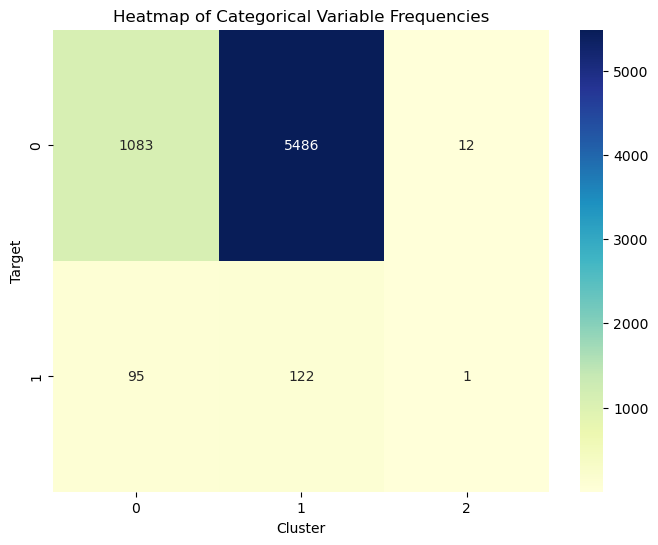

In [107]:
# Create a contingency table
contingency_table = pd.crosstab(cluster_df['Target'], cluster_df['Cluster'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Categorical Variable Frequencies')
plt.xlabel('Cluster')
plt.ylabel('Target')
plt.show()
